# Intro

Purpose:  

    Steps through the cloud retrieval of Sp_params with ORACLES 2017 data
    Checks each parameter to verify fit and appropriateness
  
Output:

    figures and save files...
    
Dependencies:

    - Sp_parameters.py : for Sp class definition, and for defining the functions used to build parameters
    - run_kisq_retrieval.py : for the retrieval functions
    - load_utils.py : for loading modis files
    - matplotlib
    - mpltools
    - numpy

  
Needed Files:

    - starzen.mat file from ORACLES 2017
    - lut file from ORACLES 2017 (v3_ORACLES_lut.mat)

# Load the modules and set up the paths

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
import os
matplotlib.rc_file(os.path.join(os.getcwd(),'file.rc'))
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpltools import color
%matplotlib notebook
import numpy as np, h5py
import scipy.io as sio
import os
import Sp_parameters as Sp
from path_utils import getpath
import hdf5storage as h5

In [2]:
# set the basic directory path
fp=getpath('ORACLES')
fp

u'/mnt/c/Users/sleblanc/Research/ORACLES/'

# Load the files

## Load the lut file and do the first processing

In [3]:
# load the idl save file containing the modeled radiances
s=h5.loadmat(fp+'model/v3_ORACLES_lut.mat')
print s.keys()

[u'tau', u'rad', u'sza', u'irr_dn_diff', u'irr_dn', u'zout', u'wvl', u'phase', u'ref', u'irr_up']


In [117]:
s['rad'].shape

(2, 1302, 3, 35, 27, 15)

In [5]:
s['sza']

array([ 18.,  37.,  46.,  53.,  57.,  61.,  64.,  66.,  68.,  69.,  71.,
        72.,  73.,  74.,  75.])

In [6]:
# select only one sza to analyze
# Choose sza 61
isza = 5
s['sza'][isza]

61.0

In [7]:
# Run the Sp calcs
lut0 = {}
lut0['tau'] = s['tau']
lut0['ref'] = s['ref']
lut0['zout'] = s['zout']
lut0['sza'] = s['sza']
lut0['phase'] = s['phase']
lut0['irr_dn_diff'] = s['irr_dn_diff'][:,:,:,:,:,isza]
lut0['irr_dn'] = s['irr_dn'][:,:,:,:,:,isza]
lut0['irr_up'] = s['irr_up'][:,:,:,:,:,isza]
lut0['wvl'] = [s['wvl']]
lut0['rad'] = s['rad'][:,:,:,:,:,isza]
lut = Sp.Sp(lut0,verbose=False)

In [9]:
lut.params(liq_only=True,ice_only=False)
lut.param_hires(start_ref=2,end_ref=30,start_tau=0.1,end_tau=60)

Running interpolation on params: [########################################]100% -- Done! 


Sp_parameters.py:585: UserWarning: Copyig the parameters calculated for liquid LUT to the ice LUT, ice parameters will be lost
  warnings.warn('Copyig the parameters calculated for liquid LUT to the ice LUT, ice parameters will be lost')


In [162]:
lut.sp_hires()
lut.norm = lut.normsp(lut.sp,iws=lut.isubwvl)

sp is already hires


## Load the starzen measurement file and run through the parameters

In [10]:
# load the matlab file containing the measured TCAP radiances
m = sio.loadmat(fp+'starzen_2017/4STAR_20170809starzen.mat')
sm = sio.idl.AttrDict(m)
print sm.keys()
print 'Measured radiance Shape: ', sm.rad.shape

['El_gnd', 'visfilen', 'tau_O3_err', 'sza', 'nirfilen', 'toggle', 'pitch', 'Tst', 'fwhm', 'raw', 'nirt', 'tau_aero_noscreening', 'rateaero', 'RHprecon_percent', 'NO2col', 'Headng', 'RH', 'Pst', 'nirheader', 'iset', 'nirdatatype', 'sd_aero_crit', 'nirTint_rad', 'dark', 'nirVdettemp', 'Elstep', 'flagfilename', 'tau_ray', 'nircols', 'sunaz', 'O3col', 'm_ray', 'forj_corr', 'tau_O4_err', 'flagallcolsitems', 't', 'c0mod', 'tau_tot_slant', 'flagallcols', '__header__', 'rate', 'visrow_labels', 'program_version', 'sat_time', 'sat_set_vis', 'm_O3', 'visheader', 'vist', 'nirTint', 'filename', 'tau_r_err', 'rads', 'high_alt_c0', 'nirsat_pixel', 'Md', 'aeronetcols', 'rateslant', 'visAVG', 'tau_NO2_err', 'Zn', 'AZstep', 'AZcorr', 'darkstd', 'visdatatype', 'QdVtot', 'nirAVG', 'sd_aerocrit', 'sun_sky_Az_offset', 'w', 'ELcorr', 'sat_nir', 'visVdettemp_C', 'El_deg', 'skyresp', 'Lon', 'tau_aero', 'daystr', 'm_H2O', 'c0err', 'viscols', 'tau_CO2_CH4_N2O_abserr', 'sun_sky_El_offset', 'airborne', 'sat_vis', 

In [12]:
m.keys()

['El_gnd',
 'Str',
 'tau_O3_err',
 'sza',
 'nirfilen',
 'toggle',
 'pitch',
 'Tst',
 'fwhm',
 'nirt',
 'tau_aero_noscreening',
 'rateaero',
 'O3h',
 'NO2col',
 'Headng',
 'RH',
 'Pst',
 'nirheader',
 'iset',
 'nirdatatype',
 'sd_aero_crit',
 'nirTint_rad',
 'dark',
 'nirVdettemp',
 'Elstep',
 'flagfilename',
 'tau_ray',
 'nircols',
 'sunaz',
 'O3col',
 'm_ray',
 'forj_corr',
 'tau_O4_err',
 'flagallcolsitems',
 't',
 'c0mod',
 'tau_tot_slant',
 'flagallcols',
 'rate',
 'daystr',
 'program_version',
 'sat_time',
 'sat_set_vis',
 'm_O3',
 'visheader',
 'Az_deg',
 'nirTint',
 'filename',
 'tau_r_err',
 'rads',
 'high_alt_c0',
 'nirsat_pixel',
 'Md',
 'aeronetcols',
 'rateslant',
 'visAVG',
 'tau_NO2_err',
 'Zn',
 'AZstep',
 't_rad',
 'darkstd',
 'visdatatype',
 'QdVtot',
 'nirAVG',
 'sd_aerocrit',
 'sun_sky_Az_offset',
 'w',
 'ELcorr',
 'sat_nir',
 'visVdettemp_C',
 'El_deg',
 'skyresp',
 'Lon',
 'tau_aero',
 'AZ_deg',
 'visrow_labels',
 'm_H2O',
 'c0err',
 'viscols',
 'tau_CO2_CH4_N2O_ab

In [88]:
reload(Sp)

<module 'Sp_parameters' from 'Sp_parameters.py'>

In [73]:
meas = Sp.Sp(m)
meas.params()

1556 1556
in rads
(1247, 1556) 2 1556
1 in ui
(1247, 1556)
Calculating the utc times
No indexed good values, choosing all times that are greater than 0 and that are not parked
length of values 1247 5231 1247
good length: 974 / 1247
Running Parameters


# Now plot the measurements and luts

## Plot all measurements

<IPython.core.display.Javascript object>


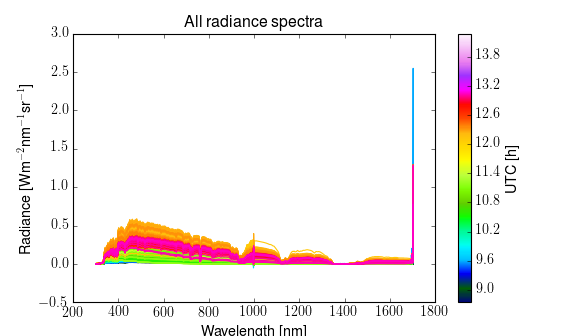

In [85]:
pz = Sp.plt_zenrad(meas,good_only=True)

<IPython.core.display.Javascript object>


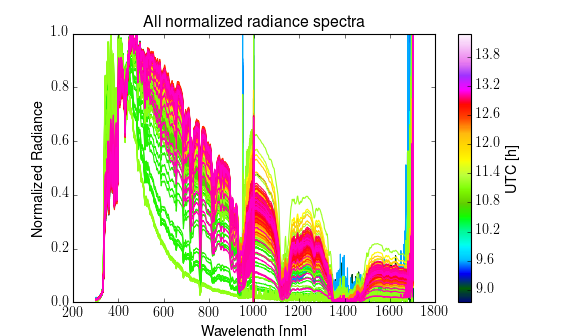

In [86]:
pn = Sp.plt_norm_zenrad(meas,good_only=True)

<IPython.core.display.Javascript object>


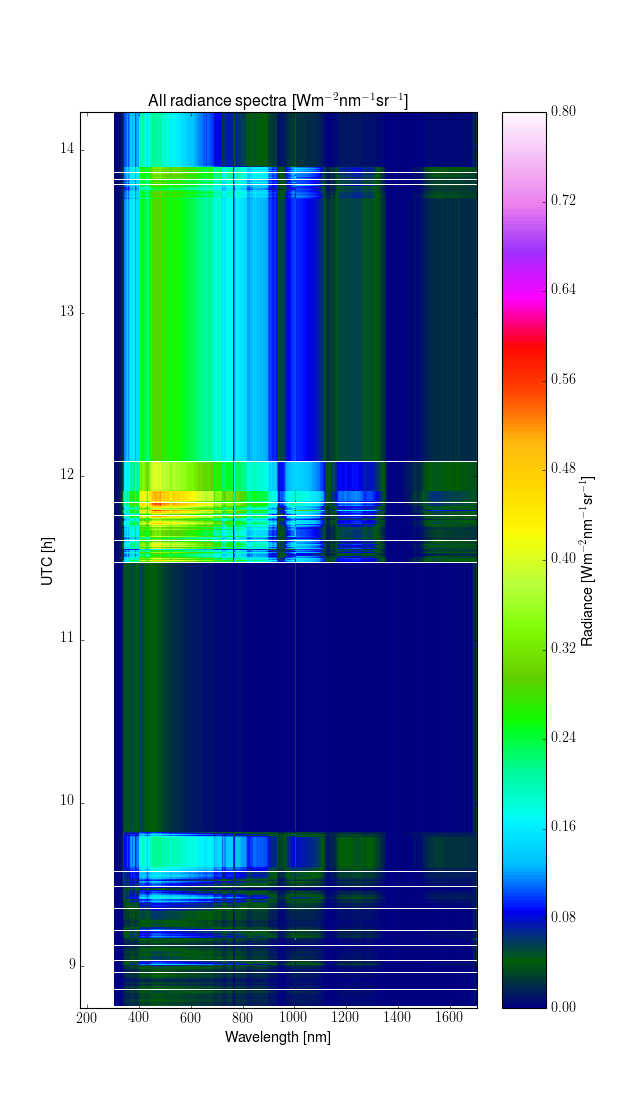

In [87]:
pc = Sp.curtain_zenrad(meas)

<IPython.core.display.Javascript object>


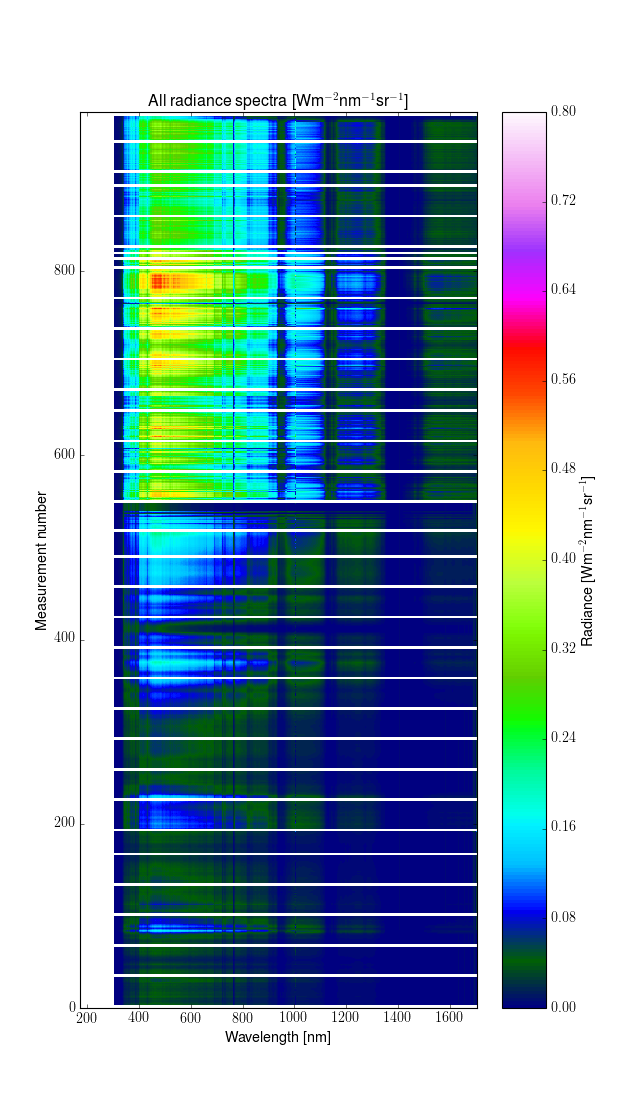

In [90]:
pcn = Sp.curtain_zenrad(meas,utc=False)

<IPython.core.display.Javascript object>


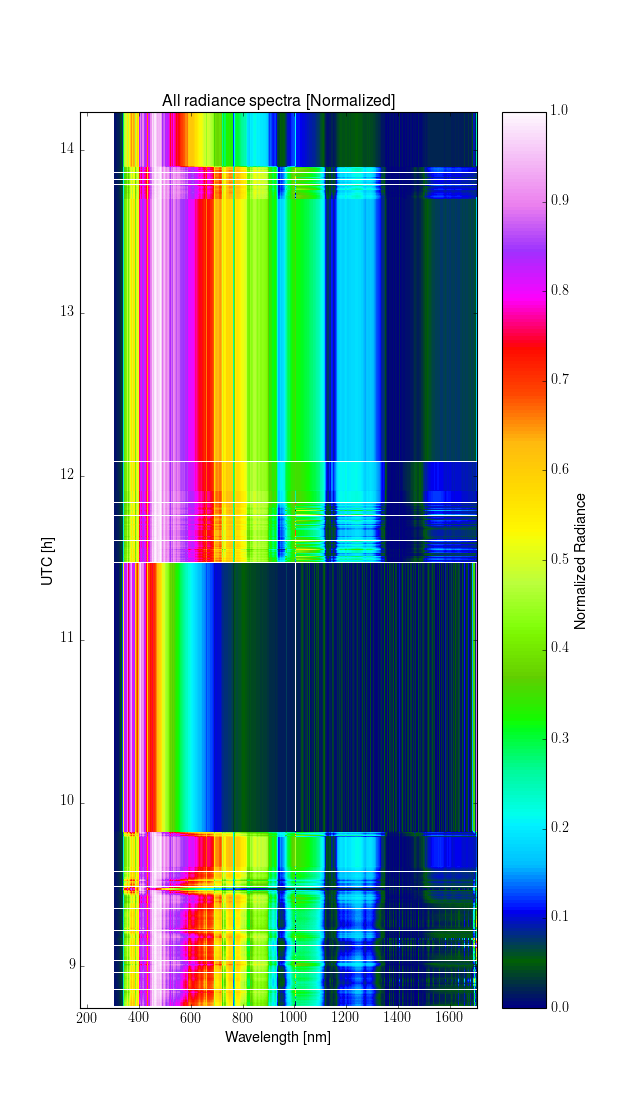

In [89]:
pnc = Sp.plt_curtain_norm_zenrad(meas)

<IPython.core.display.Javascript object>


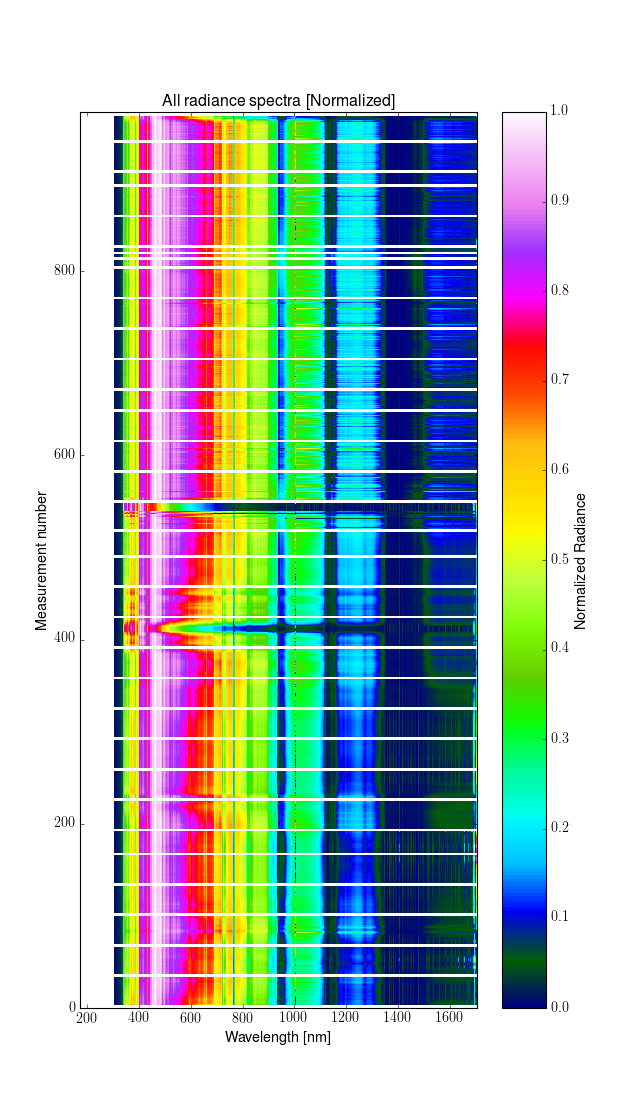

In [91]:
pncn = Sp.plt_curtain_norm_zenrad(meas,utc=False)

## Now plot the measurements for only the selected sample airmass

In [95]:
airmass = 1./np.cos(s['sza']*np.pi/180.0)
meas.airmass = 1.0/np.cos(meas.sza*np.pi/180.0)
idx = Sp.find_closest(airmass,meas.airmass)[:,0]

In [96]:
len(idx)

1247

In [97]:
idx.shape

(1247,)

In [99]:
#Create new 'good' filter
meas.good = np.where((idx==isza) & (meas.utc>0.0) &(m['Md'][meas.iset][:,0]==8))[0]
len(meas.good)

177

<IPython.core.display.Javascript object>


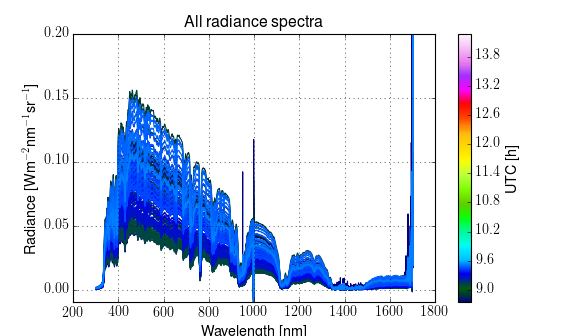

In [103]:
p = Sp.plt_zenrad(meas)
plt.ylim(-0.01,0.2)
plt.grid()

<IPython.core.display.Javascript object>


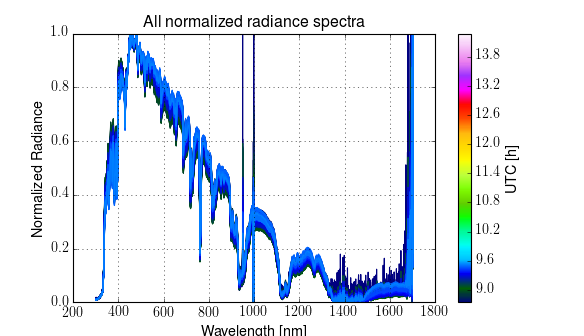

In [104]:
p = Sp.plt_norm_zenrad(meas)
plt.grid()

## Now plot a few LUT spectra

<IPython.core.display.Javascript object>


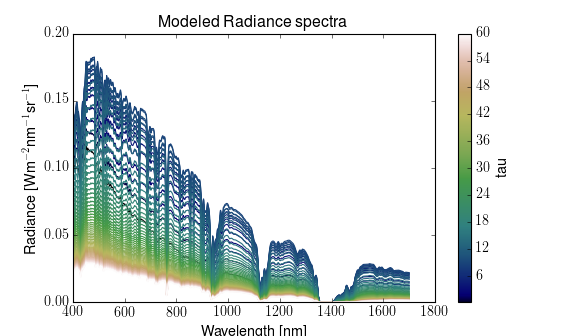

In [200]:
pl = Sp.plt_lut_zenrad(lut,range_variable='tau',norm=False,lims=[0,60],cmapname='gist_earth')

<IPython.core.display.Javascript object>


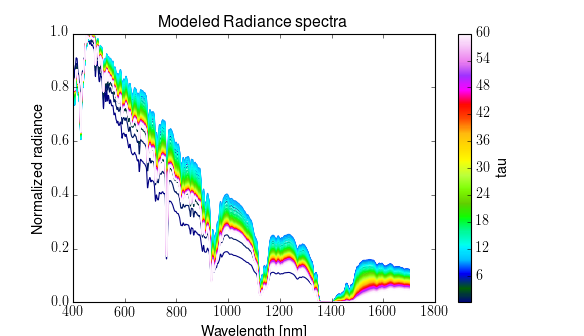

In [190]:
pl = Sp.plt_lut_zenrad(lut,range_variable='tau',norm=True,lims=[0,60])

<IPython.core.display.Javascript object>


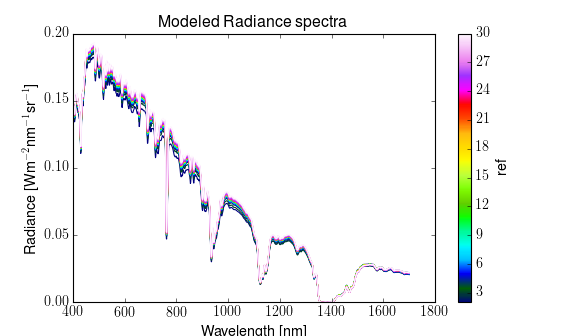

In [191]:
pl = Sp.plt_lut_zenrad(lut,range_variable='ref',norm=False,other_index=10,lims=[2,30])

<IPython.core.display.Javascript object>


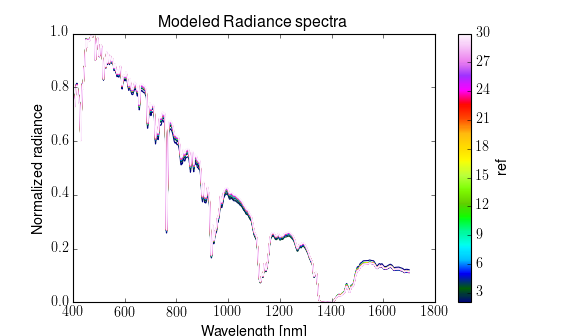

In [192]:
pl = Sp.plt_lut_zenrad(lut,range_variable='ref',norm=True,other_index=10,lims=[2,30])

## Plot the lut on top of the measurements

<IPython.core.display.Javascript object>


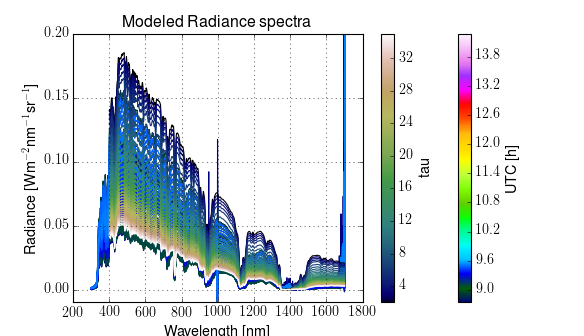

In [203]:
p = Sp.plt_zenrad(meas)
p = Sp.plt_lut_zenrad(lut,range_variable='tau',norm=False,other_index=2,lims=[2,35],cmapname='gist_earth',fig=p)
plt.ylim(-0.01,0.2)
plt.grid()

<IPython.core.display.Javascript object>


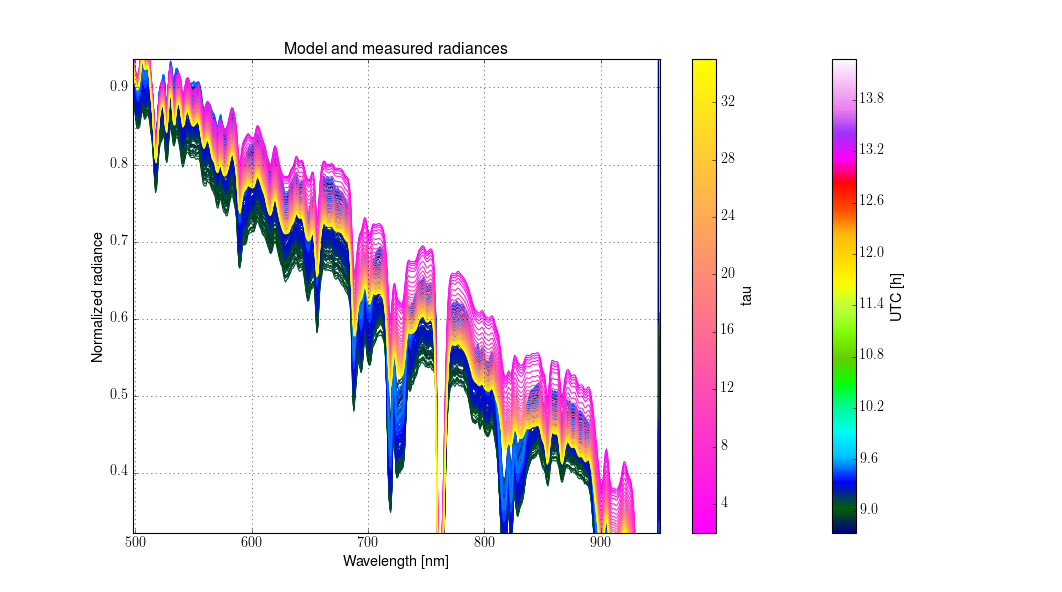

In [207]:
p = Sp.plt_norm_zenrad(meas)
p = Sp.plt_lut_zenrad(lut,range_variable='tau',norm=True,other_index=2,lims=[2,35],cmapname='spring',fig=p)
plt.title('Model and measured radiances')
plt.grid()

#### Plotting functions defined

In [9]:
# set up plotting of a few of the zenith radiance spectra
def pltzen(fig=None,ax=None, tit='Zenith spectra'):
    "Plotting of zenith measurements in radiance units"
    if ax is None: 
        fig,ax = plt.subplots()
        doaxes = True
    else:
        doaxes = False
    ax.plot(sm.nm[mask],rad,lw=2, c='k', label='4STAR measured at: '+str(time_ref))
    if doaxes:
        plt.title(tit)
        plt.ylabel('Radiance [Wm$^{-2}$nm$^{-1}$sr$^{-1}$]')
        plt.xlabel('Wavelength [nm]')
        plt.xlim([350,1700])
        plt.ylim([0,0.22])
        plt.legend(frameon=False)
    #plot_url = py.plot_mpl(fig)
    return fig,ax

def norm(fig=None,ax=None,dolegend=True):
    "Plotting of zenith measurements in normalized radiance"
    if ax is None:
        fig,ax = plt.subplots()
        doaxes = True
    else:
        doaxes = False
    ax.plot(sm.nm[mask],norm2max(rad),lw=2, c='k', label='4STAR measured at: '+str(time_ref))
    if doaxes:
        plt.title('Zenith radiance spectra')
        plt.ylabel('Normalized Radiance')
        plt.xlabel('Wavelength [nm]')
        plt.xlim([350,1700])
        plt.ylim([0,1.0])
        if dolegend:
            plt.legend(frameon=False)
    #plot_url = py.plot_mpl(fig)
    return fig,ax

def dashlen(dashlength,dashseperation,fig=plt.gcf()):
    """ Build a list of dash length that fits within the current figure or figure denoted by fig, 
        each dash is length dashlength, with its centers at dashseperation """
    totallen = fig.get_figwidth()
    numdash = int(totallen/dashseperation)*2
    f=lambda i: dashlength if i%2==0 else dashseperation-dashlength
    return tuple([f(i) for i in range(numdash)])

def plot_line_gradients(ax,s,names,cmap,iphase,irefs,itau,iwvls,pos,normalize=False):
    """ Make multiple lines on the subplot ax of the spectra s, for the case defined by names with the cmap
      for one particular phase (iphase), range of refs (irefs) and at one itau. Returns the axis handles for the thin and thick ref """
    rf = range(irefs[0],irefs[1])
    colors = plt.cm._generate_cmap(cmap,int(len(rf)*2.25))
    for ir in rf:
        if not(normalize):
            a1 = ax.plot(s.wv,s.sp[iphase,iwvls,0,ir,itau],
                         color=(0.2,0.2,0.2),
                         lw=1.0+1.4*float(ir)/irefs[1])
            ax.plot(s.wv,s.sp[iphase,iwvls,0,ir,itau],
                     color=colors(ir),
                     lw=1.0+1.3*float(ir)/irefs[1])
            ax.text(pos[0],pos[1],names,color=colors(irefs[1]))
        else:
            a1 = ax.plot(s.wv,norm2max(s.sp[iphase,iwvls,0,ir,itau]),
                         color=(0.2,0.2,0.2),
                         lw=1.0+1.4*float(ir)/irefs[1])
            ax.plot(s.wv,norm2max(s.sp[iphase,iwvls,0,ir,itau]),
                     color=colors(ir),
                     lw=1.0+1.3*float(ir)/irefs[1])    
            ax.text(pos[0],pos[1]/0.22,names,color=colors(irefs[1]))
        if ir == rf[0]:
            alow = a1
        if ir == rf[-1]:
            ahigh = a1
    return [alow,ahigh]

def plot_greys(fig=None,ax=None):
    " Plotting of grey regions that indicates the different wavelenght regions where the parameters are defined. "
    cl = '#DDDDDD'
    plt.axvspan(1000,1077,color=cl) #eta1
    plt.axvspan(1192,1194,color=cl) #eta2
    plt.axvspan(1492,1494,color=cl) #eta3
    plt.axvspan(1197,1199,color=cl); plt.axvspan(1235,1237,color=cl);  #eta4
    plt.axvspan(1248,1270,color=cl) #eta5
    plt.axvspan(1565,1644,color=cl) #eta6
    plt.axvspan(1000,1050,color=cl) #eta7
    plt.axvspan(1493,1600,color=cl) #eta8
    plt.axvspan(1000,1077,color=cl) #eta9
    plt.axvspan(1200,1300,color=cl) #eta10
    plt.axvspan(530 ,610 ,color=cl) #eta11
    plt.axvspan(1039,1041,color=cl) #eta12
    plt.axvspan(999 ,1001,color=cl); plt.axvspan(1064,1066,color=cl);  #eta13
    plt.axvspan(599 ,601 ,color=cl); plt.axvspan(869 ,871 ,color=cl);  #eta14
    plt.axvspan(1565,1634,color=cl); #eta15
    

### Plotting iterations

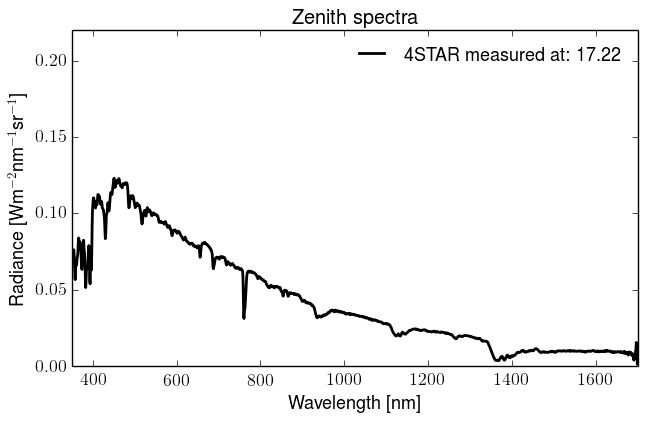

In [9]:
fig,ax=pltzen()

Next figure with modeled spectra

(<matplotlib.figure.Figure at 0x13e02c50>,
 <matplotlib.axes.AxesSubplot at 0x13e148d0>)

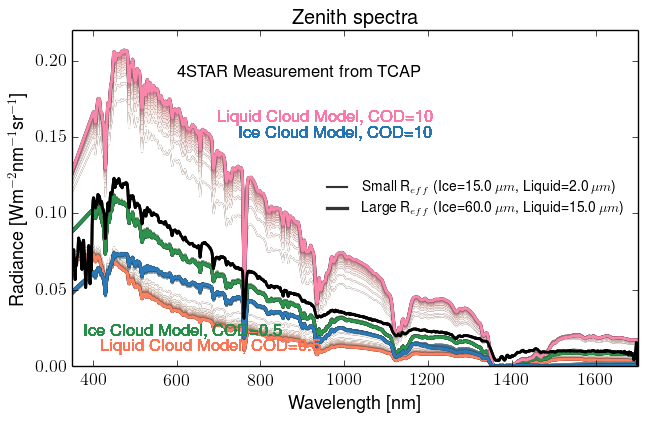

In [10]:
# now go through and add the different modeled spectra
fig,ax=pltzen()

lines = [('Liquid Cloud Model, COD=0.5','Reds',0,[0,13],1,[420,0.01]),
         ('Ice Cloud Model, COD=0.5','Greens',1,[13,34],1,[380,0.02]),
         ('Liquid Cloud Model, COD=10','RdPu',0,[0,13],9,[700,0.16]),
         ('Ice Cloud Model, COD=10','Blues',1,[13,34],9,[750,0.15])]

for names,cmap,iphase,irefs,itau,pos in lines:
    [alow,ahigh] = plot_line_gradients(ax,s,names,cmap,iphase,irefs,itau,iwvls,pos)
    
lbl=["Small R$_{eff}$ (Ice=" + str(s.ref[13]) + " $\mu m$, Liquid=" + str(s.ref[0]) + " $\mu m$)",
     "Large R$_{eff}$ (Ice=" + str(s.ref[34]) + " $\mu m$, Liquid=" + str(s.ref[13]) + " $\mu m$)"]
plt.legend([alow[0],ahigh[0]],
           lbl,
           frameon=False,loc=7,prop={'size':10})
ax.text(600,0.19,'4STAR Measurement from TCAP')
pltzen(fig,ax)

### Next figure with normalized spectra and areas of parameters

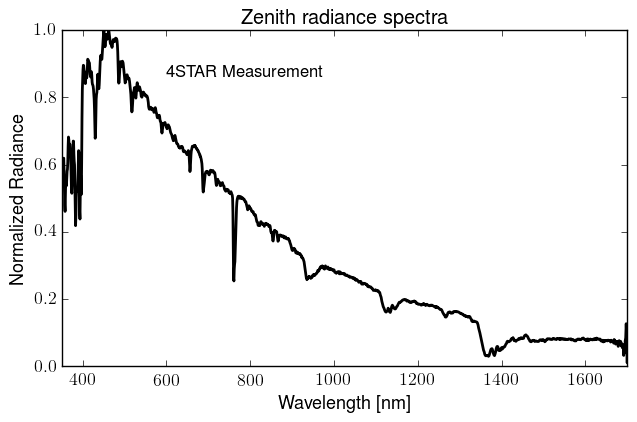

In [13]:
fig,ax = norm(dolegend=False)
plt.axvspan(350,1700,color='#FFFFFF')
ax.text(600,0.19/0.22,'4STAR Measurement')
plt.savefig(fp+'plots/zen_spectra_nomodel.png',dpi=600,transparent=True)

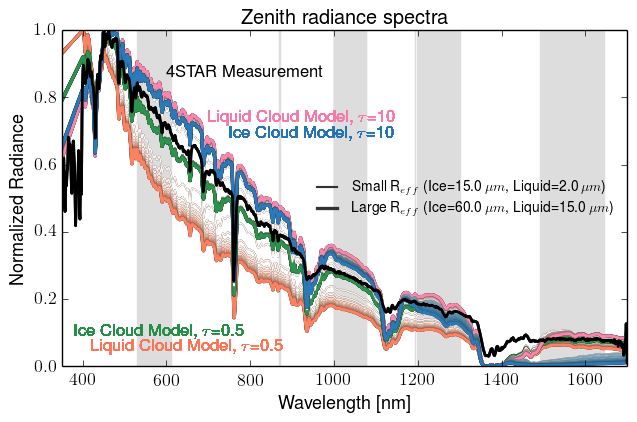

In [11]:
fig,ax=norm()
lines = [('Liquid Cloud Model, $\\tau$=0.5','Reds',0,[0,13],1,[420,0.01]),
         ('Ice Cloud Model, $\\tau$=0.5','Greens',1,[13,34],1,[380,0.02]),
         ('Liquid Cloud Model, $\\tau$=10','RdPu',0,[0,13],9,[700,0.16]),
         ('Ice Cloud Model, $\\tau$=10','Blues',1,[13,34],9,[750,0.15])]
for names,cmap,iphase,irefs,itau,pos in lines:
    [alow,ahigh] = plot_line_gradients(ax,s,names,cmap,iphase,irefs,itau,iwvls,pos,normalize=True)
plt.legend([alow[0],ahigh[0]],lbl,
           frameon=False,loc=7,prop={'size':10})
ax.text(600,0.19/0.22,'4STAR Measurement')
norm(fig,ax)
plt.axvspan(350,1700,color='#FFFFFF')
plot_greys()
plt.savefig(fp+'plots/zen_spectra_model.png',dpi=600,transparent=True)
#plt.savefig(fp+'plots/zen_spectra_model.eps')

Plot the same but with squeezed axes

In [17]:
fp

'C:\\Users\\sleblan2\\Research\\TCAP\\'

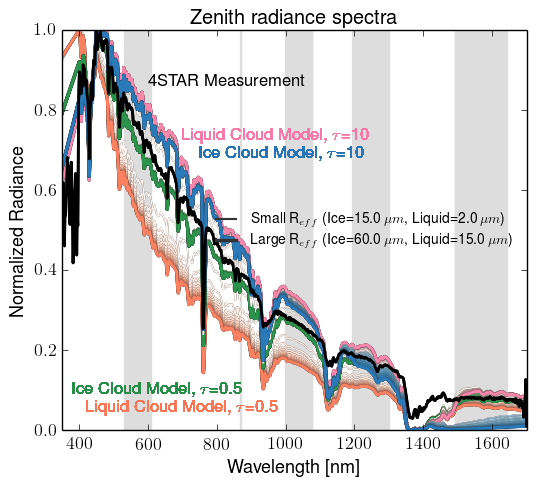

In [16]:
fig,ax=norm()
fig.set_figheight(5)
fig.set_figwidth(6)
lines = [('Liquid Cloud Model, $\\tau$=0.5','Reds',0,[0,13],1,[420,0.01]),
         ('Ice Cloud Model, $\\tau$=0.5','Greens',1,[13,34],1,[380,0.02]),
         ('Liquid Cloud Model, $\\tau$=10','RdPu',0,[0,13],9,[700,0.16]),
         ('Ice Cloud Model, $\\tau$=10','Blues',1,[13,34],9,[750,0.15])]
for names,cmap,iphase,irefs,itau,pos in lines:
    [alow,ahigh] = plot_line_gradients(ax,s,names,cmap,iphase,irefs,itau,iwvls,pos,normalize=True)
plt.legend([alow[0],ahigh[0]],lbl,
           frameon=False,loc=7,prop={'size':10})
ax.text(600,0.19/0.22,'4STAR Measurement')
norm(fig,ax)
plt.axvspan(350,1700,color='#FFFFFF')
plot_greys()
plt.savefig(fp+'plots/zen_spectra_model_squeeze.png',dpi=600,transparent=True)

### Now calculate the parameters for the measured spectra

In [12]:
map(lambda x:x*x,[-1,1,24])

[1, 1, 576]

In [13]:
reload(Sp)
if 'meas' in locals():
    del meas
    import gc; gc.collect()

In [14]:
# first convert measurements to Sp class, with inherent parameters defined
meas = Sp.Sp(m)
meas.params()

1512 1512
in rad
(3296L, 1512L) 2 1512
1 in ui
(3296L, 1512L)
Running Parameters


Plot the parameters for the specified time

ValueError: A value in x_new is below the interpolation range.

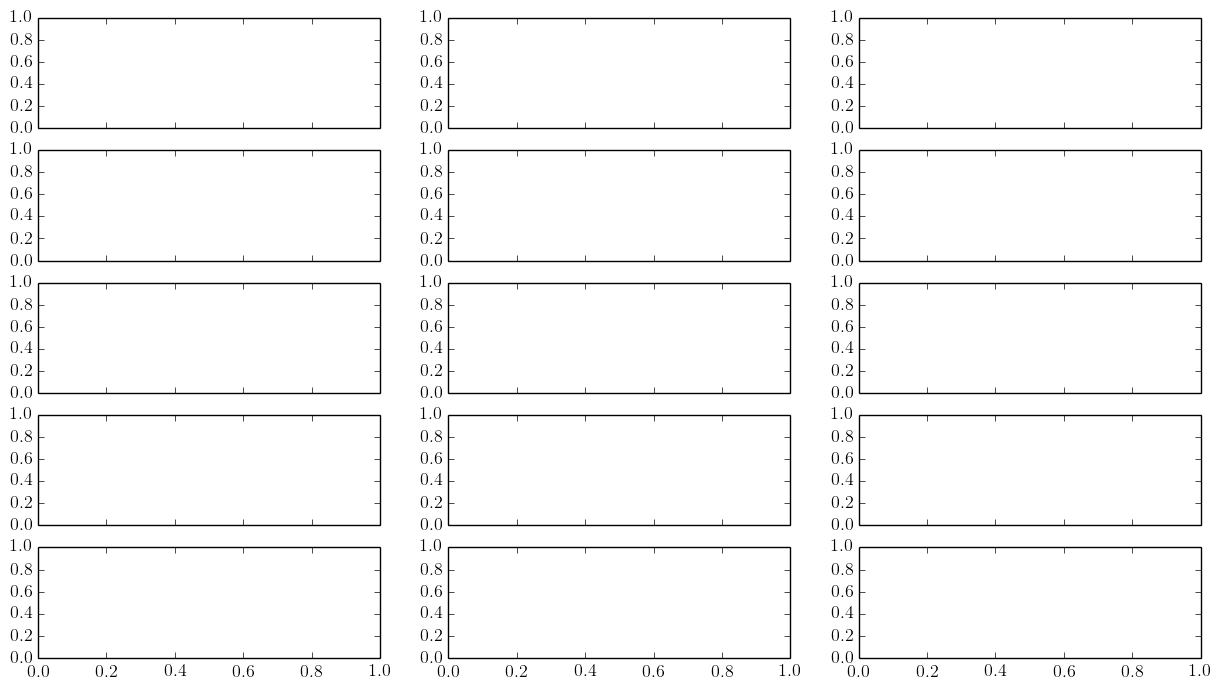

In [15]:
fig2,ax2 = plt.subplots(5,3,sharex=True,figsize=(15,8))
ax2 = ax2.ravel()
for i in range(meas.npar-1):
    ax2[i].plot(meas.utc,Sp.smooth(meas.par[:,i],3))
    ax2[i].set_title('Parameter '+str(i))
    ax2[i].grid()
    ax2[i].set_xlim([17,19])
    if i > 11: 
        ax2[i].set_xlabel('UTC [h]')

fig2.tight_layout()
plt.show()

### Prepare the LUT for the modeled spectra

In [ ]:
reload(Sp)
if 'lut' in locals():
    del lut
    import gc; gc.collect()

In [16]:
lut = Sp.Sp(s)
lut.params()
lut.param_hires()

1556 1556
in sp
(2L, 1556L, 2L, 35L, 24L)
(2L, 1556L, 2L, 35L, 24L)
Running Parameters
Running parameter hires
(111L,)
(59L,)
Running interpolation on params: [########################################]100% -- Done! 


In [17]:
import gc; gc.collect()
import sys
print sys.version

2.7.6 (default, Nov 10 2013, 19:24:24) [MSC v.1500 64 bit (AMD64)]


In [18]:
lut.sp_hires()

(111L,)
(59L,)
Running interpolation: [########################################]100% -- Done! 
Overwriting the current sp, tau, and ref with the new high resolution values


In [19]:
print lut.tau.shape
print lut.ref.shape
print lut.sp.ndim
print lut.par.size
print lut.par.shape

(111L,)
(59L,)
5
209568
(2L, 59L, 111L, 16L)


In [20]:
print lut.ref
print lut.sp[0,400,0,23,10]
print lut.sp[1,400,0,:,10]
print lut.par.shape

[  2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.
  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.
  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.
  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.]
0.127232864499
[ 0.15861613  0.15861613  0.15861613  0.15861613  0.15825042  0.15847741
  0.15860528  0.15858555  0.15873903  0.15865351  0.15871118  0.15874833
  0.15878917  0.15886921  0.15885831  0.15892817  0.15892926  0.15892231
  0.15891537  0.1589724   0.15902942  0.1590482   0.15908691  0.15912563
  0.15914816  0.15917069  0.15919322  0.15922642  0.15925963  0.15927544
  0.15929125  0.15930486  0.15931847  0.15933208  0.15934326  0.15935443
  0.15936561  0.15938444  0.15940326  0.15941963  0.15943599  0.15945235
  0.15946183  0.1594713   0.15949048  0.15950966  0.15952884  0.15954888
  0.15956892  0.15959851  0.15962811  0.15964762  0.15966713  0.15968664
  0.15966421  0.15964179  0.

Now plot the resulting lut of parameters

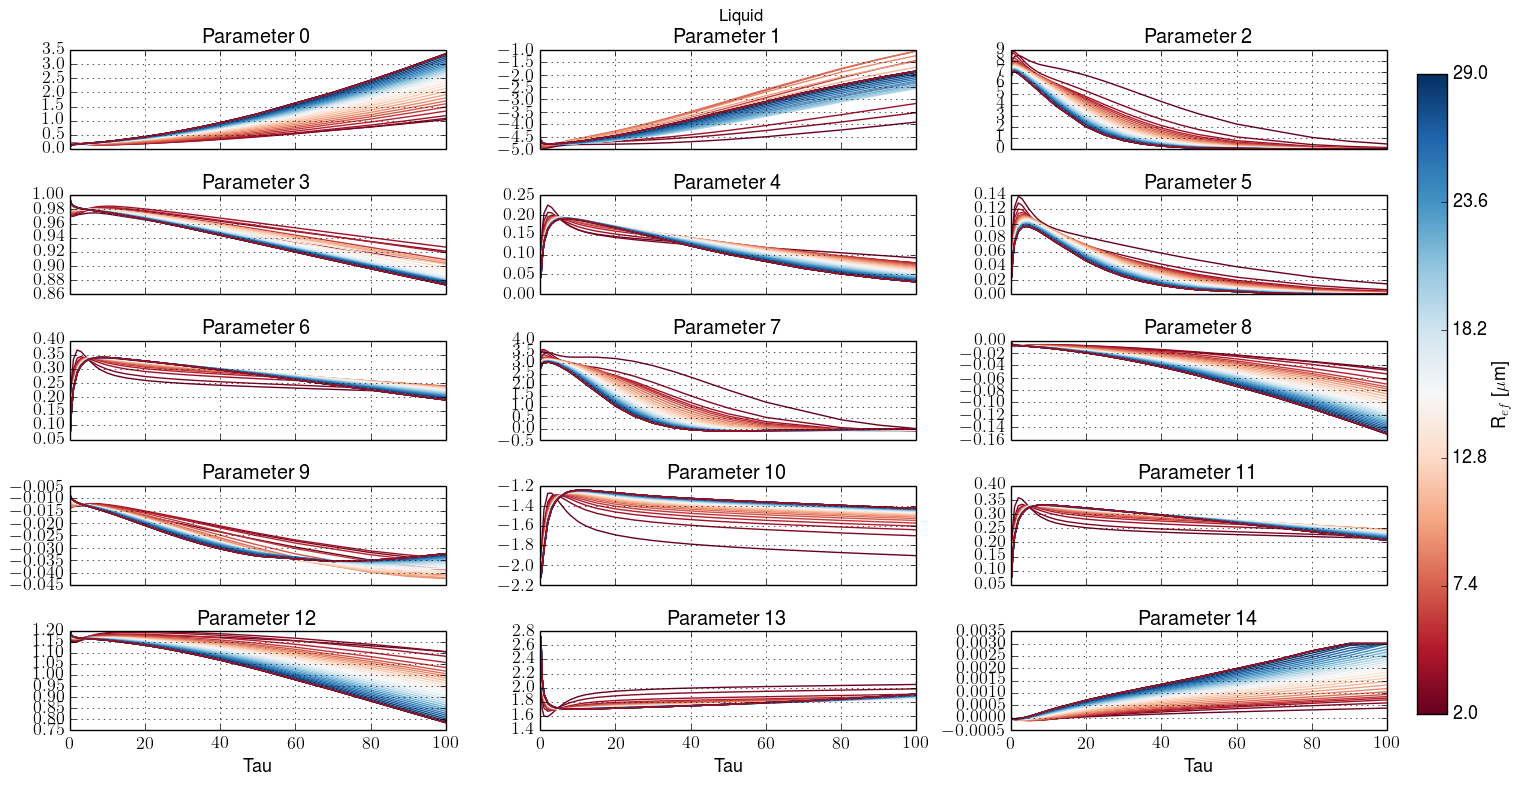

In [21]:
fig3,ax3 = plt.subplots(5,3,sharex=True,figsize=(15,8))
ax3 = ax3.ravel()

for i in range(lut.npar-1):
    color.cycle_cmap(len(lut.ref[lut.ref<30]),cmap=plt.cm.RdBu,ax=ax3[i])
    for j in xrange(len(lut.ref)):
        ax3[i].plot(lut.tau,lut.par[0,j,:,i])
    ax3[i].set_title('Parameter '+str(i))
    ax3[i].grid()
    ax3[i].set_xlim([0,100])
    if i > 11: 
        ax3[i].set_xlabel('Tau')

fig3.tight_layout()
plt.suptitle('Liquid')
plt.subplots_adjust(top=0.93,right=0.93)

cbar_ax = fig3.add_axes([0.95,0.10,0.02,0.8])
scalarmap = plt.cm.ScalarMappable(cmap=plt.cm.RdBu,norm=plt.Normalize(vmin=0,vmax=1))
scalarmap.set_array(lut.ref[lut.ref<30])
cba = plt.colorbar(scalarmap,ticks=np.linspace(0,1,6),cax=cbar_ax)
cba.ax.set_ylabel('R$_{ef}$ [$\\mu$m]')
cba.ax.set_yticklabels(np.linspace(lut.ref[0],29,6));

plt.show()

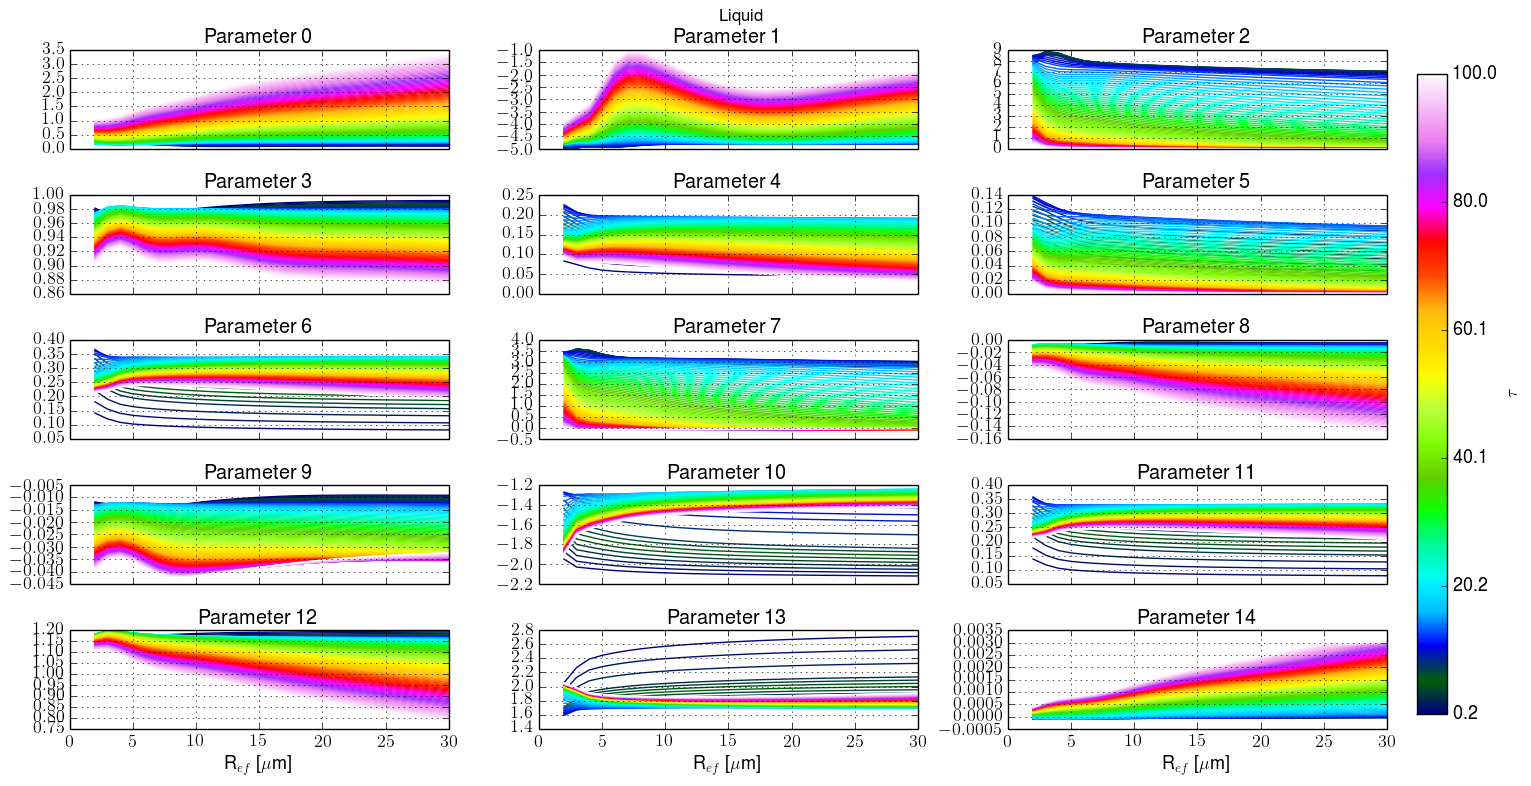

In [22]:
fig4,ax4 = plt.subplots(5,3,sharex=True,figsize=(15,8))
ax4 = ax4.ravel()

for i in range(lut.npar-1):
    color.cycle_cmap(len(lut.tau),cmap=plt.cm.gist_ncar,ax=ax4[i])
    for j in xrange(len(lut.tau)):
        ax4[i].plot(lut.ref,lut.par[0,:,j,i])
    ax4[i].set_title('Parameter '+str(i))
    ax4[i].grid()
    ax4[i].set_xlim([0,30])
    if i > 11: 
        ax4[i].set_xlabel('R$_{ef}$ [$\mu$m]')

fig4.tight_layout()
plt.suptitle('Liquid')
plt.subplots_adjust(top=0.93,right=0.93)

cbar_ax = fig4.add_axes([0.95,0.10,0.02,0.8])
scalarmap = plt.cm.ScalarMappable(cmap=plt.cm.gist_ncar,norm=plt.Normalize(vmin=0,vmax=1))
scalarmap.set_array(lut.tau)
cba = plt.colorbar(scalarmap,ticks=np.linspace(0,1,6),cax=cbar_ax)
cba.ax.set_ylabel('$\\tau$')
labels = ['%5.1f' %F for F in np.linspace(lut.tau[0],lut.tau[-1],6)]
cba.ax.set_yticklabels(labels);

plt.show()

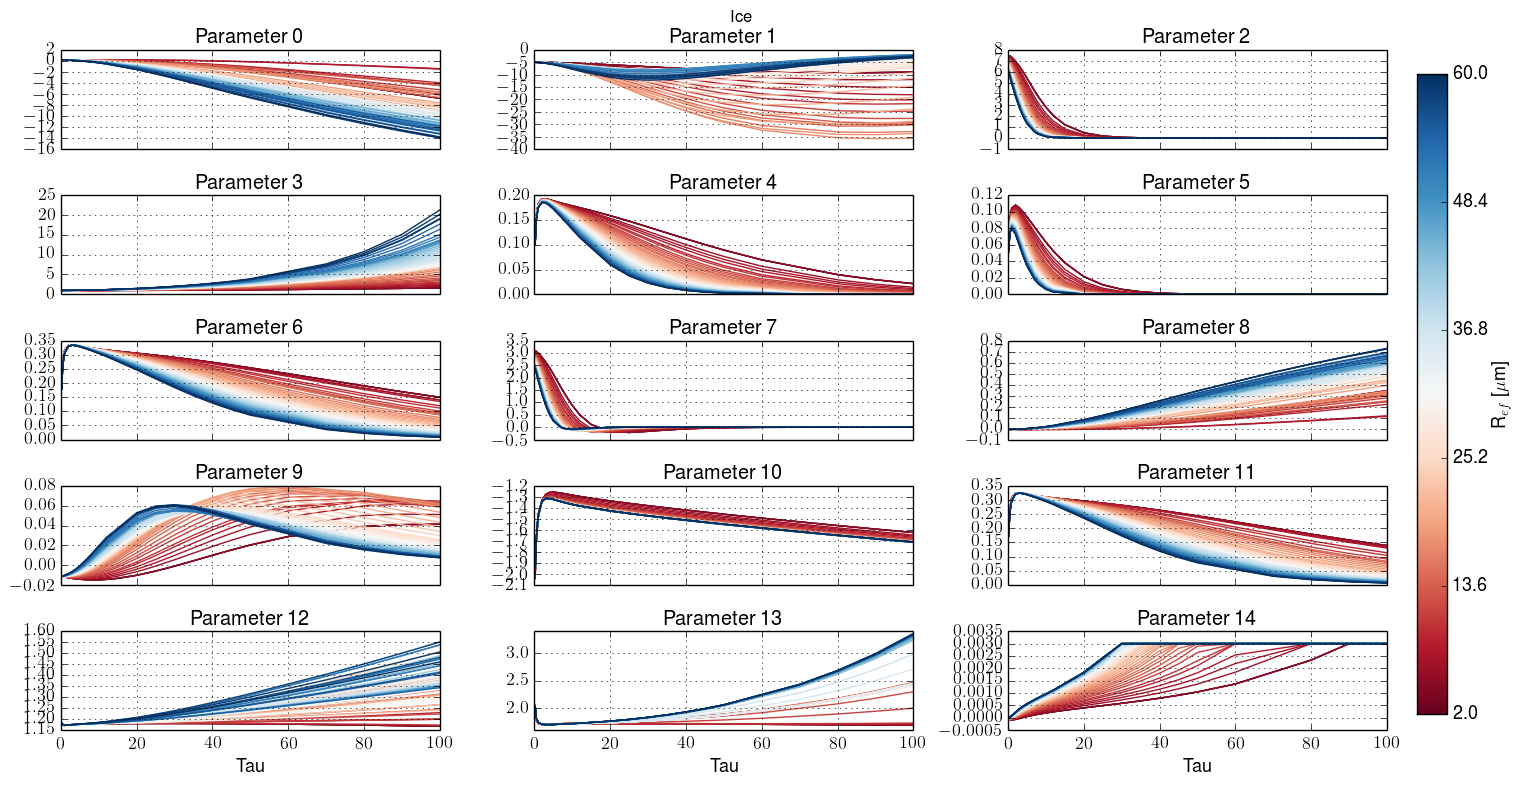

In [23]:
fig5,ax5 = plt.subplots(5,3,sharex=True,figsize=(15,8))
ax5 = ax5.ravel()

for i in range(lut.npar-1):
    color.cycle_cmap(len(lut.ref),cmap=plt.cm.RdBu,ax=ax5[i])
    for j in xrange(len(lut.ref)):
        ax5[i].plot(lut.tau,lut.par[1,j,:,i])
    ax5[i].set_title('Parameter '+str(i))
    ax5[i].grid()
    ax5[i].set_xlim([0,100])
    if i > 11: 
        ax5[i].set_xlabel('Tau')

fig5.tight_layout()
plt.suptitle('Ice')
plt.subplots_adjust(top=0.93,right=0.93)
cbar_ax = fig5.add_axes([0.95,0.10,0.02,0.8])
scalarmap = plt.cm.ScalarMappable(cmap=plt.cm.RdBu,norm=plt.Normalize(vmin=0,vmax=1))
scalarmap.set_array(lut.ref)
cba = plt.colorbar(scalarmap,ticks=np.linspace(0,1,6),cax=cbar_ax)
cba.ax.set_ylabel('R$_{ef}$ [$\\mu$m]')
cba.ax.set_yticklabels(np.linspace(lut.ref[0],lut.ref[-1],6));
plt.show()

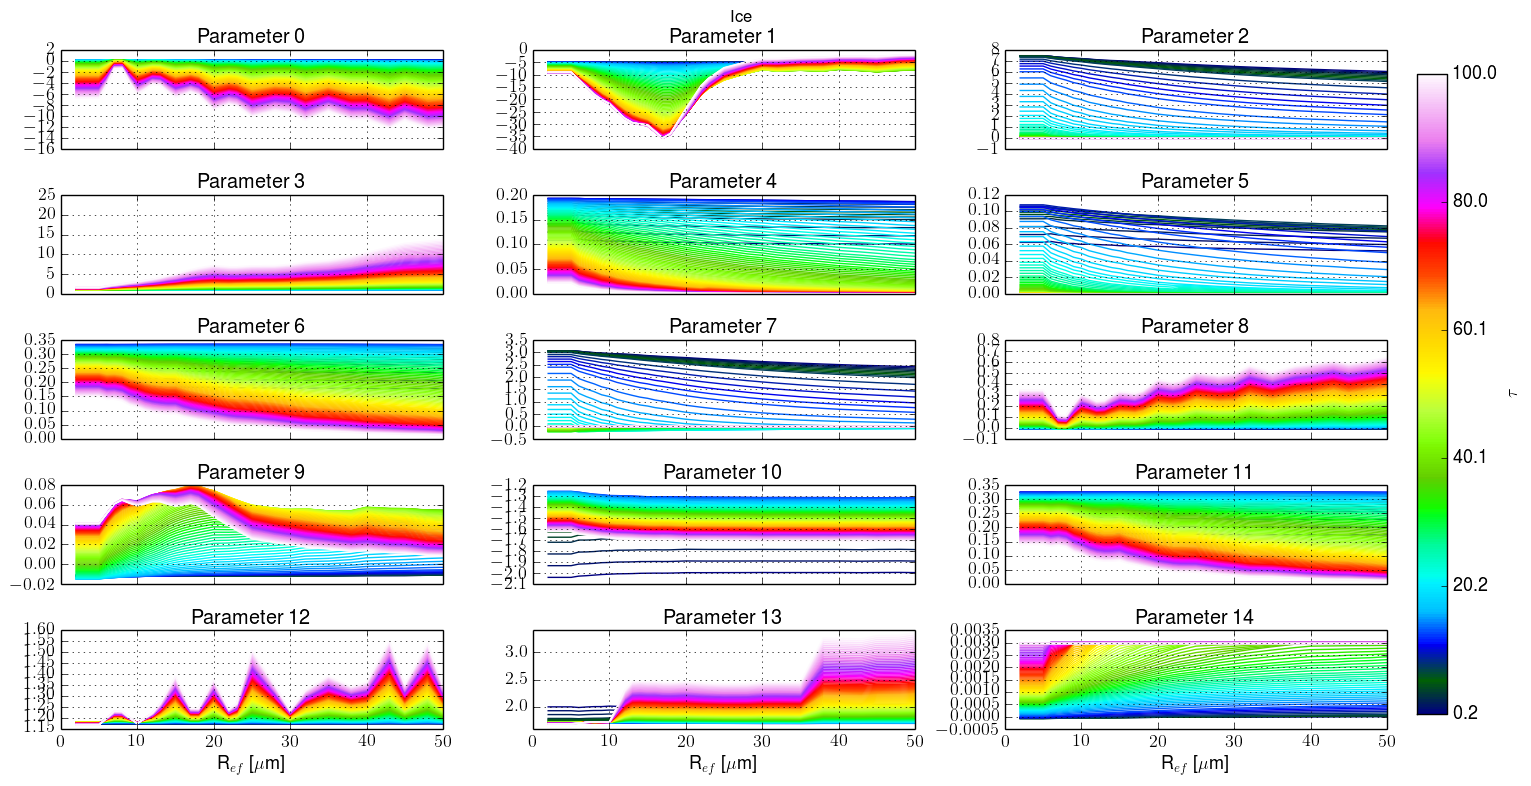

In [24]:
fig6,ax6 = plt.subplots(5,3,sharex=True,figsize=(15,8))
ax6 = ax6.ravel()
for i in range(lut.npar-1):
    color.cycle_cmap(len(lut.tau),cmap=plt.cm.gist_ncar,ax=ax6[i])
    for j in xrange(len(lut.tau)):
        ax6[i].plot(lut.ref,lut.par[1,:,j,i])
    ax6[i].set_title('Parameter '+str(i))
    ax6[i].grid()
    ax6[i].set_xlim([0,50])
    if i > 11: 
        ax6[i].set_xlabel('R$_{ef}$ [$\mu$m]')

fig6.tight_layout()
plt.suptitle('Ice')
plt.subplots_adjust(top=0.93,right=0.93)
cbar_ax = fig6.add_axes([0.95,0.10,0.02,0.8])
scalarmap = plt.cm.ScalarMappable(cmap=plt.cm.gist_ncar,norm=plt.Normalize(vmin=0,vmax=1))
scalarmap.set_array(lut.tau)
cba = plt.colorbar(scalarmap,ticks=np.linspace(0,1,6),cax=cbar_ax)
cba.ax.set_ylabel('$\\tau$')
labels = ['%5.1f' %F for F in np.linspace(lut.tau[0],lut.tau[-1],6)]
cba.ax.set_yticklabels(labels);
plt.show()

Now run through a few spectra for double checking the input to make sure everythin matches

In [25]:
print lut.sp.shape
print lut.tau[80]

(2L, 1556L, 2L, 59L, 111L)
70.0


In [26]:
print meas.par.shape

(3296L, 16L)


In [27]:
print meas.par[meas.good[200],13]

[ 1.76823716]


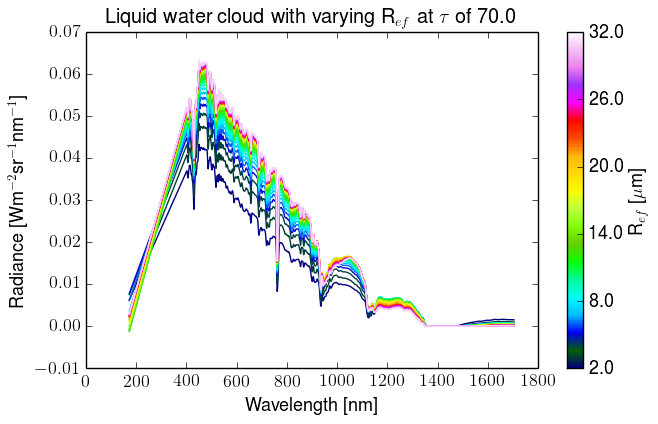

In [28]:
plt.figure()
color.cycle_cmap(31,cmap=plt.cm.gist_ncar)
for i in xrange(30):
    plt.plot(lut.wvl,lut.sp[0,:,0,i,80])
plt.title('Liquid water cloud with varying R$_{ef}$ at $\\tau$ of '+str(lut.tau[80]))
plt.xlabel('Wavelength [nm]')
plt.ylabel('Radiance [Wm$^{-2}$sr$^{-1}$nm$^{-1}$]')
scalarmap = plt.cm.ScalarMappable(cmap=plt.cm.gist_ncar
                                  ,norm=plt.Normalize(vmin=0,vmax=1))
scalarmap.set_array(lut.ref[range(30)])
cba = plt.colorbar(scalarmap,ticks=np.linspace(0,1,6))
cba.ax.set_ylabel('R$_{ef}$ [$\\mu$m]')
cba.ax.set_yticklabels(np.linspace(lut.ref[0],lut.ref[30],6));

False
0.0620211884379 2.16666819597e-07
True
30.0


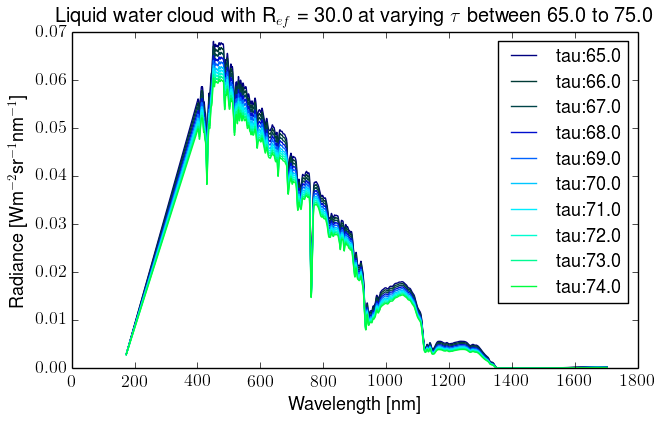

In [29]:
all_zeros = not np.any(lut.sp[0,:,0,40,39])
print all_zeros
print np.max(lut.sp[0,:,0,20,80]), np.min(lut.sp[0,:,0,20,80])
print np.any(lut.sp[0,:,0,20,70])
print lut.ref[28]
plt.figure()
for i in xrange(75,85):
    plt.plot(lut.wvl,lut.sp[0,:,0,28,i], label="tau:"+str(lut.tau[i]))
plt.legend()
plt.title('Liquid water cloud with R$_{ef}$ = '+str(lut.ref[28])+' at varying $\\tau$ between '+str(lut.tau[75])+' to '+str(lut.tau[85]))
plt.xlabel('Wavelength [nm]')
plt.ylabel('Radiance [Wm$^{-2}$sr$^{-1}$nm$^{-1}$]')


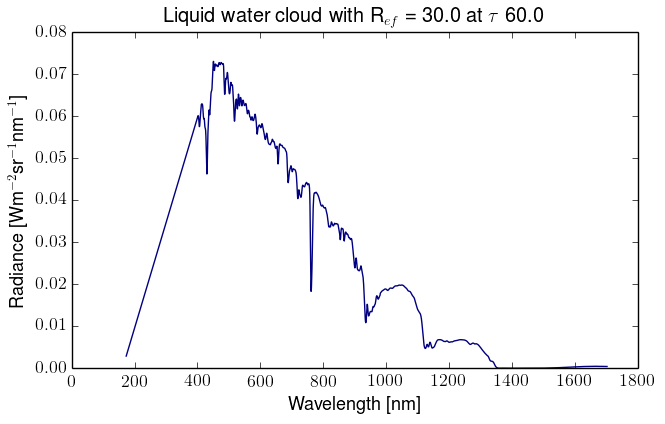

In [30]:
plt.figure()
plt.plot(lut.wvl,lut.sp[0,:,0,28,70])
plt.title('Liquid water cloud with R$_{ef}$ = '+str(lut.ref[28])+' at $\\tau$ '+str(lut.tau[70]))
plt.xlabel('Wavelength [nm]')
plt.ylabel('Radiance [Wm$^{-2}$sr$^{-1}$nm$^{-1}$]')

In [31]:
print np.any(lut.sp[0,:,0,28,70])
print lut.ref[3]

True
5.0


In [32]:
ro = (range(1,20),range(4,50))
print ro[1]
print ro[0]

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [33]:
from scipy import interpolate
print np.shape([lut.tau[69],lut.tau[71]])
print np.shape([lut.sp[0,:,0,28,69],lut.sp[0,:,0,28,69]])
fs = interpolate.interp1d([lut.tau[69],lut.tau[71]],[lut.sp[0,:,0,28,69],lut.sp[0,:,0,28,69]],axis=0)
sss = fs(lut.tau[70])

(2L,)
(2L, 1556L)


(1556L,)
<type 'numpy.ndarray'>


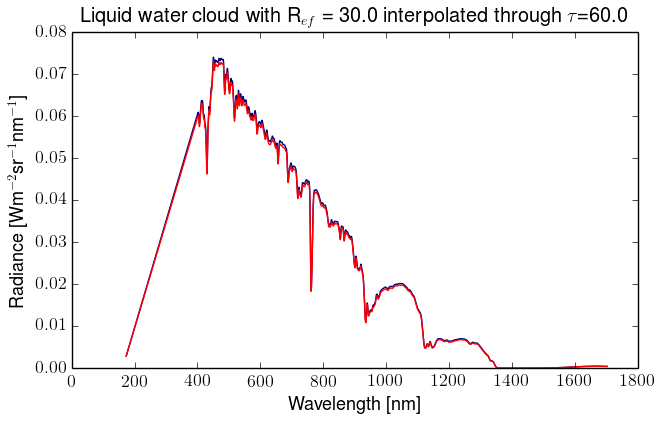

In [34]:
print np.shape(sss)
plt.figure()
plt.plot(lut.wvl,sss)
plt.plot(lut.wvl,lut.sp[0,:,0,28,70],'r')
print type(sss)
plt.title('Liquid water cloud with R$_{ef}$ = '+str(lut.ref[28])+' interpolated through $\\tau$='+str(lut.tau[70]))
plt.xlabel('Wavelength [nm]')
plt.ylabel('Radiance [Wm$^{-2}$sr$^{-1}$nm$^{-1}$]')

## Now run through the retrieval scheme

In [35]:
import run_kisq_retrieval as rk
reload(rk)
import Sp_parameters as Sp
reload(Sp)
#del lut
#del meas

<module 'Sp_parameters' from 'Sp_parameters.pyc'>

In [36]:
print max(meas.good)

[3276]


In [37]:
(tau,ref,phase,ki) = rk.run_retrieval(meas,lut)

Retrieval progress over times: [########################################]100% -- Done! 


In [38]:
del lut

In [39]:
print meas.utc.shape
print len(meas.good), max(meas.good)

(3296L, 1L)
823 [3276]


In [40]:
reload(Sp)
from Sp_parameters import smooth

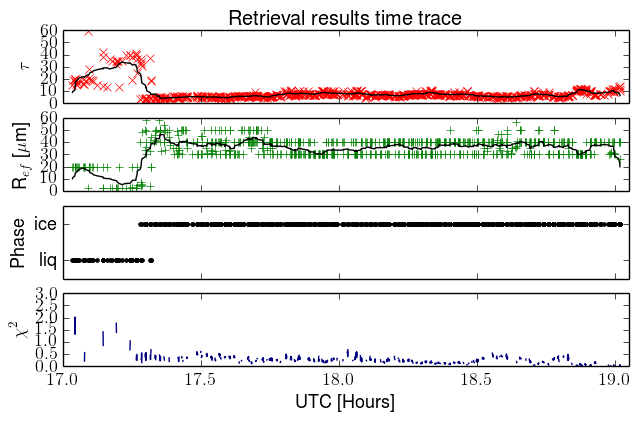

In [41]:
fig,ax = plt.subplots(4,sharex=True)
ax[0].set_title('Retrieval results time trace')
ax[0].plot(meas.utc,tau,'rx')
ax[0].plot(meas.utc[meas.good[:,0]],smooth(tau[meas.good[:,0],0],20),'k')
ax[0].set_ylabel('$\\tau$')
ax[1].plot(meas.utc,ref,'g+')
ax[1].set_ylabel('R$_{ef}$ [$\\mu$m]')
ax[1].plot(meas.utc[meas.good[:,0]],smooth(ref[meas.good[:,0],0],20),'k')
ax[2].plot(meas.utc,phase,'k.')
ax[2].set_ylabel('Phase')
ax[2].set_ylim([-0.5,1.5])
ax[2].set_yticks([0,1])
ax[2].set_yticklabels(['liq','ice'])
ax[3].plot(meas.utc,ki)
ax[3].set_ylabel('$\\chi^{2}$')
ax[3].set_xlabel('UTC [Hours]')
ax[3].set_xlim([17,19.05])
plt.savefig(fp+'plots/TCAP_retri_results.png',dpi=600)
#plt.savefig(fp+'plots/TCAP_retri_results.eps')

Now save the smoothed values

In [42]:
print tau.shape

(3296L, 1L)


In [43]:
tau[meas.good[:,0],0] = smooth(tau[meas.good[:,0],0],20)
ref[meas.good[:,0],0] = smooth(ref[meas.good[:,0],0],20)

### Now load the results from MODIS to compare

Check the day of year

In [44]:
import datetime
doy = datetime.datetime(2013,2,19)
print doy.timetuple().tm_yday
dd = datetime.datetime(2014,9,19)
print dd.timetuple().tm_yday

50
262


Now import the hdf files of MODIS

In [45]:
from mpl_toolkits.basemap import Basemap,cm

In [46]:
myd06_file = fp+'MODIS\\MYD06_L2.A2013050.1725.006.2014260074007.hdf'
myd03_file = fp+'MODIS\\MYD03.A2013050.1725.006.2013051163424.hdf'
print os.path.isfile(myd03_file) #check if it exists
print os.path.isfile(myd06_file)

True
True


In [47]:
import load_utils as lm
reload(lm)
if 'modis' in locals():
    del modis, modis_dicts
    import gc; gc.collect()
    

Load the geolocated data:

In [48]:
print 'after import'
import gc; gc.collect()
modis,modis_dicts = lm.load_modis(myd03_file,myd06_file)

after import
Outputting the Geo subdatasets:
0: [4060x2708] Scan Offset MODIS_Swath_Type_GEO (8-bit integer)
1: [4060x2708] Track Offset MODIS_Swath_Type_GEO (8-bit integer)
2: [4060x2708] Height Offset MODIS_Swath_Type_GEO (8-bit integer)
3: [2030x1354] Height MODIS_Swath_Type_GEO (16-bit integer)
4: [2030x1354] SensorZenith MODIS_Swath_Type_GEO (16-bit integer)
5: [2030x1354] SensorAzimuth MODIS_Swath_Type_GEO (16-bit integer)
6: [2030x1354] Range MODIS_Swath_Type_GEO (16-bit unsigned integer)
7: [2030x1354] SolarZenith MODIS_Swath_Type_GEO (16-bit integer)
8: [2030x1354] SolarAzimuth MODIS_Swath_Type_GEO (16-bit integer)
9: [2030x1354] Land/SeaMask MODIS_Swath_Type_GEO (8-bit unsigned integer)
10: [2030x1354] WaterPresent MODIS_Swath_Type_GEO (8-bit unsigned integer)
11: [2030x1354] gflags MODIS_Swath_Type_GEO (8-bit unsigned integer)
12: [2030x1354] Latitude (32-bit floating-point)
13: [2030x1354] Longitude (32-bit floating-point)
14: [4060x2708] Scan Offset (8-bit integer)
15: [40

In [49]:
print modis_dicts['qa']['description']

\n                                                                                  
                                                                                    
Quality Assurance 1km reports on Cloud Optical Properties                           
algorithm performance.  Refer to MOD_PR06OD User Documentation and the              
MODIS atmosphere QA plan for complete descriptions and coding examples.             
                                                                                    
 Bit fields within each byte are numbered from the left:                            
 7, 6, 5, 4, 3, 2, 1, 0.                                                            
 The left-most bit (bit 7) is the most significant bit.                             
 The right-most bit (bit 0) is the least significant bit.                           
                                                                                    
                                                                 

In [50]:
modis['qa'].shape

(2030L, 1354L, 9L)

In [51]:
bb = modis['qa'][100,100,:]
print bb
bb.dtype
print bb.astype('ubyte')
def bin(x):
    return ''.join(x & (1 << i) and '1' or '0' for i in range(7,-1,-1))
bin(bb[0])

[231  23 170   0  80   0  42  42  34]
[231  23 170   0  80   0  42  42  34]


'11100111'

In [52]:
bin8 = lambda x : ''.join(reversed( [str((x >> i) & 1) for i in range(8)] ) )

In [53]:
mqa = modis['qa']

In [54]:
for i in mqa:
    print i

[[  0   0  32 ...,   0   0   0]
 [  0  16 162 ...,  34  34  34]
 [  0  16 162 ...,  34  42  34]
 ..., 
 [231   7 122 ...,  42  42  32]
 [231   7 114 ..., 162 162 160]
 [  0   0  32 ...,   0   0   0]]
[[  0   0  32 ...,   0   0   0]
 [  0  16 162 ...,  34 162  34]
 [  0  80 162 ...,  34  42  34]
 ..., 
 [231   7 122 ...,  42  42  32]
 [231   7 114 ..., 162 162 160]
 [  0   0  32 ...,   0   0   0]]
[[  0   0  32 ...,   0   0   0]
 [231  23 162 ...,  34 162 162]
 [  0  16 162 ...,  34  42  34]
 ..., 
 [231   7 122 ...,  34  42  32]
 [231   7 114 ...,  34 162 160]
 [  0   0  32 ...,   0   0   0]]
[[  0   0  32 ...,   0   0   0]
 [  0  16 162 ..., 162 162  34]
 [  0  16 162 ...,  34  42  34]
 ..., 
 [231   7 122 ...,  42  42  32]
 [231   7 114 ..., 162 162 160]
 [  0   0  32 ...,   0   0   0]]
[[  0   0  32 ...,   0   0   0]
 [  0  16 162 ...,  34 162  34]
 [  0  16 162 ...,  42  42  34]
 ..., 
 [231   7 122 ...,  42  42  32]
 [231   7 114 ..., 162 162 160]
 [  0   0  32 ...,   0   0   0]]


In [55]:
if bin8(bb[1])[-4]:
    print 'yes'
bin8(bb[1])[-4]

yes


'0'

Now plot the resulting imagery

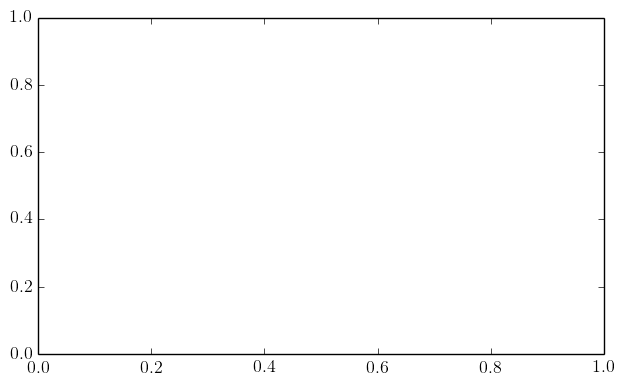

In [56]:
#set up a easy plotting function
def tcap_map(ax=plt.gca()):
    m = Basemap(projection='stere',lon_0=-70,lat_0=42,
            llcrnrlon=-72, llcrnrlat=40,
            urcrnrlon=-66, urcrnrlat=45,resolution='h',ax=ax)
    m.drawcoastlines()
    #m.fillcontinents(color='#AAAAAA')
    m.drawstates()
    m.drawcountries()
    m.drawmeridians(np.linspace(-66,-72,6),labels=[0,0,0,1])
    m.drawparallels(np.linspace(40,45,5),labels=[1,0,0,0])
    return m

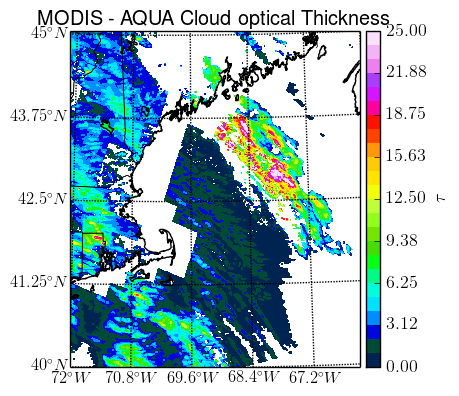

In [57]:
figm = plt.figure()
axm = figm.add_axes([0.1,0.1,0.8,0.8])
m = tcap_map(axm)
x,y = m(modis['lon'],modis['lat'])
clevels = np.linspace(0,25,25)
cs = m.contourf(x,y,modis['tau'],clevels,cmap=plt.cm.gist_ncar)
cbar = m.colorbar(cs)
cbar.set_label('$\\tau$')
axm.set_title('MODIS - AQUA Cloud optical Thickness')

In [58]:
plt.savefig?

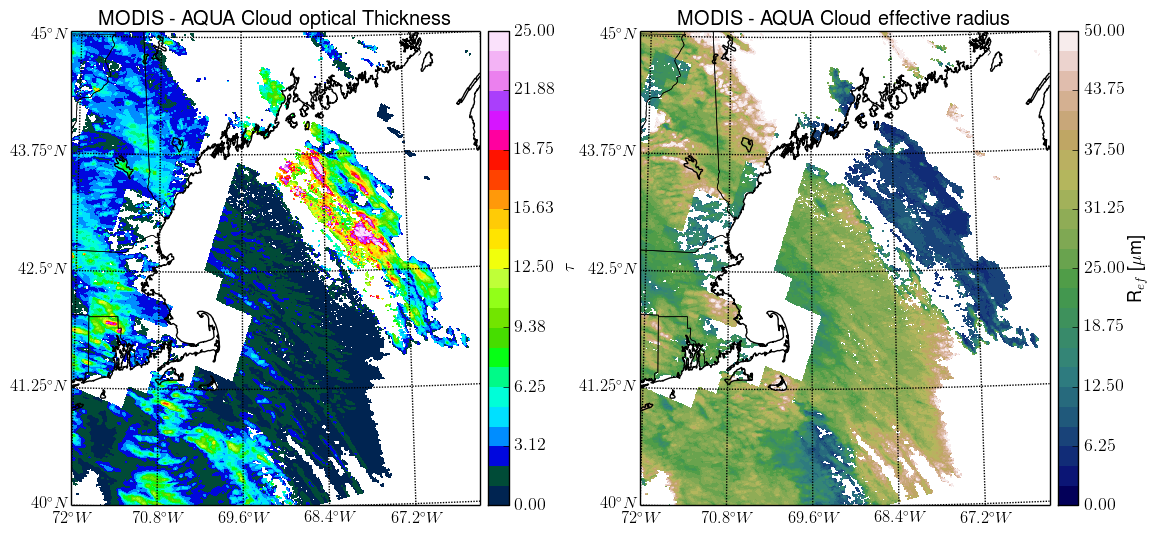

In [59]:
figm2,axm2 = plt.subplots(1,2,figsize=(13,13))
m1 = tcap_map(axm2[0])
m2 = tcap_map(axm2[1])
x,y = m1(modis['lon'],modis['lat'])
clevels = np.linspace(0,25,25)

cs1 = m1.contourf(x,y,modis['tau'],clevels,cmap=plt.cm.gist_ncar)
cbar = m1.colorbar(cs1)
cbar.set_label('$\\tau$')
axm2[0].set_title('MODIS - AQUA Cloud optical Thickness')

clevels2 = np.linspace(0,50,25)
cs2 = m2.contourf(x,y,modis['ref'],clevels2,cmap=plt.cm.gist_earth)
cbar = m2.colorbar(cs2)
cbar.set_label('R$_{ef}$ [$\\mu$m]')
axm2[1].set_title('MODIS - AQUA Cloud effective radius')
figm2.subplots_adjust(wspace=0.3)
plt.show()
plt.savefig(fp+'plots/modis_only_tau_ref_comp.png',dpi=600)
plt.savefig(fp+'plots/modis_only_tau_ref_comp.pdf',bbox='tight')

Now load the aircraft telemetry onto the plot

In [60]:
reload(lm)

<module 'load_modis' from 'load_modis.pyc'>

In [61]:
# load the ict file and check out the results
iwg = lm.load_ict(fp+'arm-iop/aaf.iwg1001s.g1.TCAP.20130219.145837.a1.dat')
print iwg.dtype.names
print iwg.dtype.names.index('Date_Time')
print iwg['Date_Time'][0]
print type(iwg['Date_Time'][0])
iwg['Lat']

('IWG1', 'Date_Time', 'Lat', 'Lon', 'GPS_MSL_Alt', 'WGS_84_Alt', 'Press_Alt', 'Radar_Alt', 'Grnd_Spd', 'True_Airspeed', 'Indicated_Airspeed', 'Mach_Number', 'Vert_Velocity', 'True_Hdg', 'Track', 'Drift', 'Pitch', 'Roll', 'Side_slip', 'Angle_of_Attack', 'Ambient_Temp', 'Dew_Point', 'Total_Temp', 'Static_Press', 'Dynamic_Press', 'Cabin_Pressure', 'Wind_speed', 'Wind_Dir', 'Vert_Wind_Spd', 'Solar_Zenith', 'Sun_Elev_AC', 'Sun_Az_Grd', 'Sun_Az_AC', 'Flag_qc', 'Flag_ac', 'Flag_SPLATT', 'Flag_cloud', 'Flag_cloudP', 'RH_water', 'RH_ice', 'Theta', 'Cabin_Temperature')
('IWG1', 'Date_Time', 'Lat', 'Lon', 'GPS_MSL_Alt', 'WGS_84_Alt', 'Press_Alt', 'Radar_Alt', 'Grnd_Spd', 'True_Airspeed', 'Indicated_Airspeed', 'Mach_Number', 'Vert_Velocity', 'True_Hdg', 'Track', 'Drift', 'Pitch', 'Roll', 'Side_slip', 'Angle_of_Attack', 'Ambient_Temp', 'Dew_Point', 'Total_Temp', 'Static_Press', 'Dynamic_Press', 'Cabin_Pressure', 'Wind_speed', 'Wind_Dir', 'Vert_Wind_Spd', 'Solar_Zenith', 'Sun_Elev_AC', 'Sun_Az_Grd',

array([ 41.667  ,  41.6665 ,  41.666  , ...,  41.67367,  41.67333,  41.673  ])

In [62]:
iwg_utch = np.array([i.hour+i.minute/60.+i.second/3600.+i.microsecond/3600000. for i in iwg['Date_Time']])

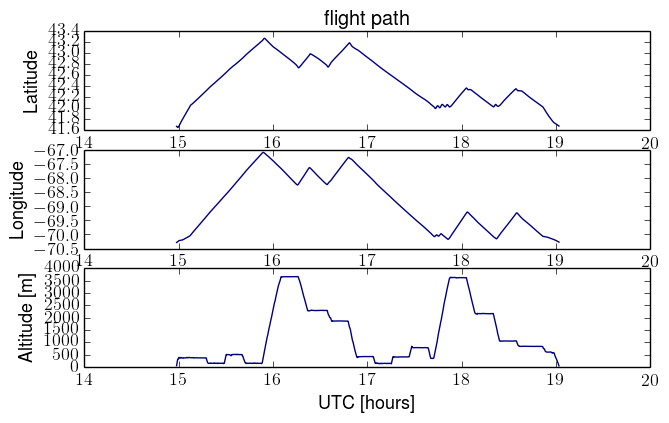

In [86]:
fig = plt.figure()
fig.add_subplot(3,1,1)
ax = plt.plot(iwg_utch,iwg['Lat'])
plt.ylabel('Latitude')
plt.title('flight path')
fig.add_subplot(3,1,2)
plt.plot(iwg_utch,iwg['Lon'])
plt.ylabel('Longitude')
fig.add_subplot(3,1,3)
plt.plot(iwg_utch,iwg['GPS_MSL_Alt'])
plt.xlabel('UTC [hours]')
plt.ylabel('Altitude [m]')

## interpolate the lat and lons and alts to retrieved values

In [64]:
from scipy import interpolate

In [65]:
flat = interpolate.interp1d(iwg_utch,iwg['Lat'])
meas.lat = flat(meas.utc)
flon = interpolate.interp1d(iwg_utch,iwg['Lon'])
meas.lon = flon(meas.utc)
falt = interpolate.interp1d(iwg_utch,iwg['GPS_MSL_Alt'])
meas.alt = falt(meas.utc)

Now plot on top of the maps

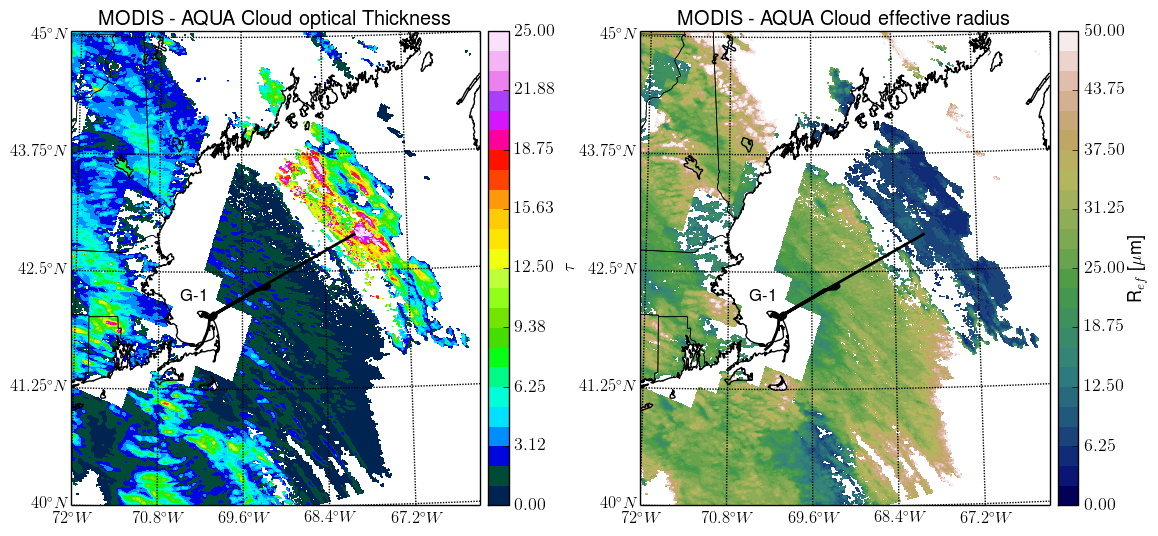

In [92]:
figm2,axm2 = plt.subplots(1,2,figsize=(13,13))
m1 = tcap_map(axm2[0])
m2 = tcap_map(axm2[1])
x,y = m1(modis['lon'],modis['lat'])
clevels = np.linspace(0,25,25)

cs1 = m1.contourf(x,y,modis['tau'],clevels,cmap=plt.cm.gist_ncar)
cbar = m1.colorbar(cs1)
cbar.set_label('$\\tau$')
axm2[0].set_title('MODIS - AQUA Cloud optical Thickness')
x1,y1 = m1(meas.lon,meas.lat)
#m1.scatter(x1,y1,c=tau,cmap=plt.cm.gist_ncar,marker='o',vmin=clevels[0],vmax=clevels[-1],alpha=0.5,edgecolors='k',linewidth=0.25)
xt1, yt1 = m1(-70.5,42.2)
m1.plot(x1,y1,'k',lw=2)
axm2[0].text(xt1,yt1,'G-1',color='k')

clevels2 = np.linspace(0,50,25)
cs2 = m2.contourf(x,y,modis['ref'],clevels2,cmap=plt.cm.gist_earth)
cbar = m2.colorbar(cs2)
cbar.set_label('R$_{ef}$ [$\\mu$m]')
axm2[1].set_title('MODIS - AQUA Cloud effective radius')
#m2.scatter(x1,y1,c=ref,cmap=plt.cm.gist_earth,marker='o',vmin=clevels2[0],vmax=clevels2[-1],alpha=0.5,edgecolors='k',linewidth=0.25)
xt2, yt2 = m2(-70.5,42.2)
axm2[1].text(xt2,yt2,'G-1',color='k')
m2.plot(x1,y1,'k',lw=2)
figm2.subplots_adjust(wspace=0.3)
plt.savefig(fp+'plots/modis_g1_tau_ref_path.png',dpi=600,transparent=True)
#plt.savefig(fp+'plots/modis_g1_tau_ref_comp.pdf',bbox='tight')
#plt.show()

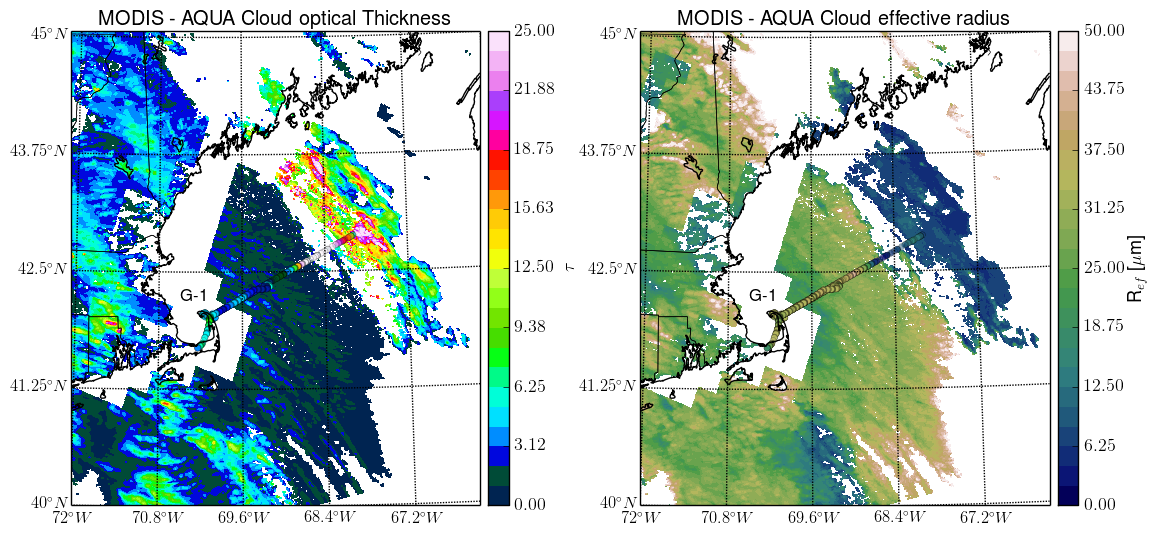

In [94]:
figm2,axm2 = plt.subplots(1,2,figsize=(13,13))
m1 = tcap_map(axm2[0])
m2 = tcap_map(axm2[1])
x,y = m1(modis['lon'],modis['lat'])
clevels = np.linspace(0,25,25)

cs1 = m1.contourf(x,y,modis['tau'],clevels,cmap=plt.cm.gist_ncar)
cbar = m1.colorbar(cs1)
cbar.set_label('$\\tau$')
axm2[0].set_title('MODIS - AQUA Cloud optical Thickness')
x1,y1 = m1(meas.lon,meas.lat)
m1.scatter(x1,y1,c=tau-3.0,cmap=plt.cm.gist_ncar,marker='o',vmin=clevels[0],vmax=clevels[-1],alpha=0.5,edgecolors='k',linewidth=0.25)
xt1, yt1 = m1(-70.5,42.2)
plt.text(xt1,yt1,'G-1',color='k')

clevels2 = np.linspace(0,50,25)
cs2 = m2.contourf(x,y,modis['ref'],clevels2,cmap=plt.cm.gist_earth)
cbar = m2.colorbar(cs2)
cbar.set_label('R$_{ef}$ [$\\mu$m]')
axm2[1].set_title('MODIS - AQUA Cloud effective radius')
m2.scatter(x1,y1,c=ref-3.0,cmap=plt.cm.gist_earth,marker='o',vmin=clevels2[0],vmax=clevels2[-1],alpha=0.5,edgecolors='k',linewidth=0.25)
xt2, yt2 = m2(-70.5,42.2)
plt.text(xt2,yt2,'G-1',color='k')

figm2.subplots_adjust(wspace=0.3)
plt.savefig(fp+'plots/modis_g1_tau_ref_comp.png',dpi=600,transparent=True)
#plt.savefig(fp+'plots/modis_g1_tau_ref_comp.pdf',bbox='tight')
plt.show()

Now find the modis points along flight track that match the most

In [67]:
from Sp_parameters import closestindex,startprogress,progress,endprogress
import scipy.spatial

823
3296
3296
4983552
3276


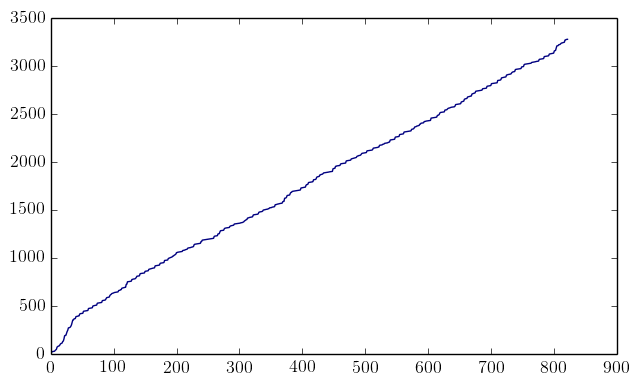

In [68]:
if max(meas.good) > meas.utc.size:
    meas.good = sm.good
print len(meas.good)
print meas.utc.size
print len(meas.lon)
print meas.sp.size
print meas.good.max()
plt.figure()
plt.plot(meas.good)

In [69]:
imodis = np.logical_and(np.logical_and(modis['lon']>min(meas.lon[meas.good])-0.02 , modis['lon']<max(meas.lon[meas.good])+0.02),
                        np.logical_and(modis['lat']>min(meas.lat[meas.good])-0.02 , modis['lat']<max(meas.lat[meas.good])+0.02))

In [70]:
wimodis = np.where(imodis)
print np.shape(wimodis)

(2L, 20266L)


In [71]:
def spherical_dist(pos1, pos2, r=3958.75):
    pos1 = pos1 * np.pi / 180
    pos2 = pos2 * np.pi / 180
    cos_lat1 = np.cos(pos1[..., 0])
    cos_lat2 = np.cos(pos2[..., 0])
    cos_lat_d = np.cos(pos1[..., 0] - pos2[..., 0])
    cos_lon_d = np.cos(pos1[..., 1] - pos2[..., 1])
    return r * np.arccos(cos_lat_d - cos_lat1 * cos_lat2 * (1 - cos_lon_d))

In [72]:
N1 = modis['lon'][imodis].size
modis_grid = np.hstack([modis['lon'][imodis].reshape((N1,1)),modis['lat'][imodis].reshape((N1,1))])
print N1
#measurement
N2 = len(meas.good)
print N2
meas_grid = np.hstack([np.array(meas.lon[meas.good]).reshape((N2,1)),np.array(meas.lat[meas.good]).reshape((N2,1))])
meas_in = meas_grid.astype(int)
print len(meas_grid[0])

20266
823
2


Test if the spherical dist works for one point along the track

In [73]:
d = spherical_dist(meas_grid[0],modis_grid)
print d.shape
print np.argmin(d)
print len(wimodis[0])
print len(wimodis[1])
print wimodis[0][np.argmin(d)]
print wimodis[1][np.argmin(d)]

(20266L,)
16091
20266
20266
292
891


In [74]:
print meas.lat[0]
print meas.lon[0]
print modis['lon'][292,891]
print modis['lat'][292,891]

[ 42.88651836]
[-67.969946]
-67.9834
42.8459


In [75]:
meas.ind = np.array([meas.good.ravel()*0,meas.good.ravel()*0])
print np.shape(meas.ind)
meas.ind[0,0] = 2
meas.ind[1,0] = 3
print meas.ind[:,0]

(2L, 823L)
[2 3]


The spherical distance works for one point along track, now loop through all values

In [76]:
startprogress('Running through flight track')
for i in xrange(meas.good.size):
    d = spherical_dist(meas_grid[i],modis_grid)
    meas.ind[0,i] = wimodis[0][np.argmin(d)]
    meas.ind[1,i] = wimodis[1][np.argmin(d)]
    progress(float(i)/len(meas.good)*100)
endprogress()

Running through flight track: [########################################]100% -- Done! 


In [77]:
print modis['tau'].shape
print np.shape(modis['tau'][meas.ind])
print modis['tau'][meas.ind[0,:],meas.ind[1,:]]
print meas.utc[meas.good].ravel().shape
print meas.good.shape

(2030L, 1354L)
(2L, 823L, 1354L)
[ 13.2799997   13.2799997   14.57999967  11.95999973  11.95999973
  11.95999973   6.46999986   6.41999986   7.69999983  10.96999975
  12.20999973  11.56999974   9.84999978   9.84999978   9.56999979
          nan          nan          nan          nan   6.02999987
   6.02999987          nan          nan          nan          nan
          nan   7.09999984          nan          nan          nan
          nan          nan          nan          nan   0.76999998
   0.67999998   0.67999998   0.74999998   0.74999998   0.74999998
   0.80999998   0.80999998   0.80999998          nan          nan
          nan   0.74999998   0.74999998   0.74999998   0.82999998
   0.82999998   0.82999998   0.78999998   0.78999998   0.78999998
   0.78999998   0.78999998   0.89999998   0.77999998   0.77999998
   0.81999998   0.81999998   0.81999998   0.81999998   0.81999998
   0.84999998   0.84999998   0.81999998   0.81999998   0.94999998
   0.92999998   1.01999998   1.01999998   1

## Now plot MODIS and the retrieval result

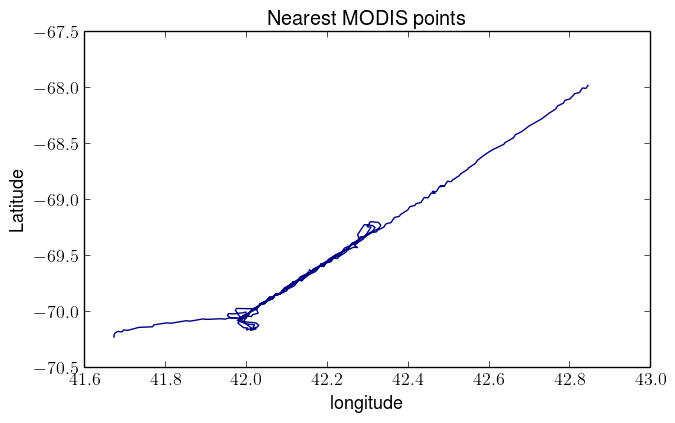

In [78]:
fig = plt.figure()
plt.plot(modis['lat'][meas.ind[0,:],meas.ind[1,:]],modis['lon'][meas.ind[0,:],meas.ind[1,:]])
plt.title('Nearest MODIS points')
plt.ylabel('Latitude')
plt.xlabel('longitude')

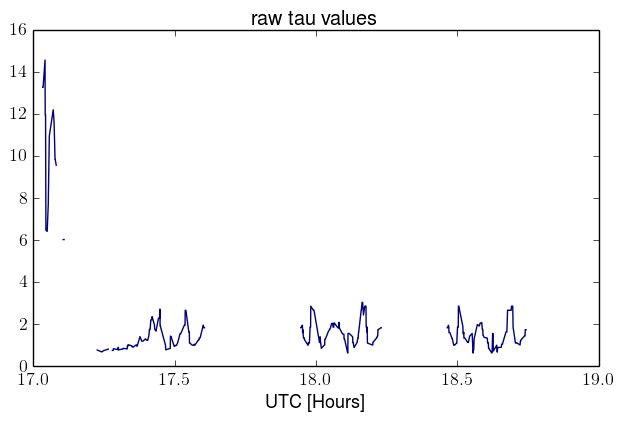

In [79]:
fig = plt.figure()
plt.plot(meas.utc[meas.good].ravel(),modis['tau'][meas.ind[0,:],meas.ind[1,:]])
plt.title('raw tau values')
plt.xlabel('UTC [Hours]')

In [80]:
modis_dicts['phase']

{'ALGORITHMPACKAGEACCEPTANCEDATE': 'June 1997',
 'ALGORITHMPACKAGEMATURITYCODE': 'at-launch',
 'ALGORITHMPACKAGENAME': 'ATBD-MOD-04 and ATBD-MOD-05',
 'ALGORITHMPACKAGEVERSION': '2',
 'ALGORITHM_VERSION_CLOUD_PHASE_IR': '1',
 'ALGORITHM_VERSION_CLOUD_PROPERTY_VIS': '1',
 'ALGORITHM_VERSION_CLOUD_TOP_PROPERTY_IR': '1',
 'ANCILLARYINPUTPOINTER': 'MYD03.A2013050.1725.006.2013051163424.hdf',
 'ANCILLARYINPUTTYPE': 'Geolocation',
 'ASSOCIATEDINSTRUMENTSHORTNAME': 'MODIS',
 'ASSOCIATEDPLATFORMSHORTNAME': 'Aqua',
 'ASSOCIATEDSENSORSHORTNAME': 'MODIS',
 'AUTOMATICQUALITYFLAG': 'Passed',
 'AUTOMATICQUALITYFLAGEXPLANATION': 'Passed: >10% useable; Failed: <10% useable',
 'Cell_Across_Swath_Sampling': '1, 1354, 1',
 'Cell_Along_Swath_Sampling': '1, 2030, 1',
 'CirrusCloudDetectedPct_IR': '   53.90',
 'Clear_Sky_Restoral_Status': 'y',
 'CloudPhaseUncertainPct_IR': '   25.06',
 'Collection_4_Phase_Used': 'n',
 'DAYNIGHTFLAG': 'Day',
 'DESCRREVISION': '6.0',
 'EASTBOUNDINGCOORDINATE': '-50.5525201518

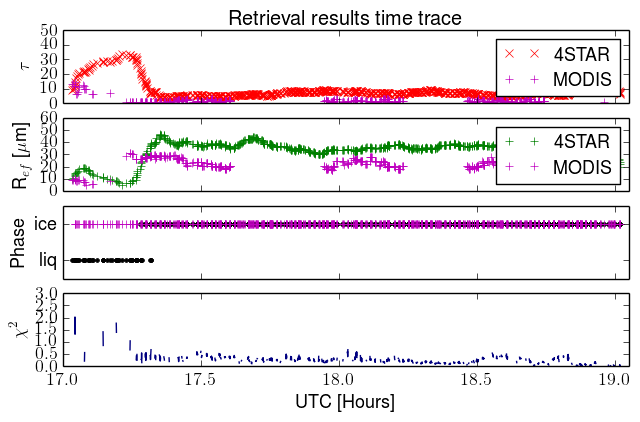

In [81]:
fig,ax = plt.subplots(4,sharex=True)
ax[0].set_title('Retrieval results time trace')
ax[0].plot(meas.utc,tau,'rx',label='4STAR')
#ax[0].plot(meas.utc[meas.good[:,0]],smooth(tau[meas.good[:,0],0],20),'k')
ax[0].plot(meas.utc[meas.good].ravel(),modis['tau'][meas.ind[0,:],meas.ind[1,:]],'m+',label='MODIS')
ax[0].set_ylabel('$\\tau$')
ax[0].set_ylim([0,50])
ax[0].legend()
ax[1].plot(meas.utc,ref,'g+',label='4STAR')
ax[1].set_ylabel('R$_{ef}$ [$\\mu$m]')
ax[1].plot(meas.utc[meas.good].ravel(),modis['ref'][meas.ind[0,:],meas.ind[1,:]],'m+',label='MODIS')
ax[1].set_ylim([0,60])
ax[1].legend()
#ax[1].plot(meas.utc[meas.good[:,0]],smooth(ref[meas.good[:,0],0],20),'k')
ax[2].plot(meas.utc,phase,'k.')
ax[2].set_ylabel('Phase')
ax[2].set_ylim([-0.5,1.5])
ax[2].set_yticks([0,1])
ax[2].set_yticklabels(['liq','ice'])
ax[2].plot(meas.utc[meas.good].ravel(),modis['phase'][meas.ind[0,:],meas.ind[1,:]]-1,'m+')
ax[3].plot(meas.utc,ki)
ax[3].set_ylabel('$\\chi^{2}$')
ax[3].set_xlabel('UTC [Hours]')
ax[3].set_xlim([17,19.05])
plt.savefig(fp+'plots/modis_4star_time_comp.png',dpi=600)
plt.savefig(fp+'plots/modis_4star_time_comp.pdf',bbox='tight')

Redo plot above, but with only tau and ref for comparison

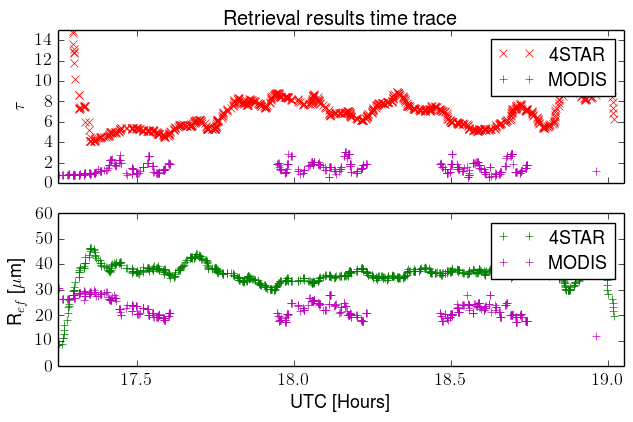

In [82]:
fig,ax = plt.subplots(2,sharex=True)
ax[0].set_title('Retrieval results time trace')
ax[0].plot(meas.utc,tau,'rx',label='4STAR')
#ax[0].plot(meas.utc[meas.good[:,0]],smooth(tau[meas.good[:,0],0],20),'k')
ax[0].plot(meas.utc[meas.good].ravel(),modis['tau'][meas.ind[0,:],meas.ind[1,:]],'m+',label='MODIS')
ax[0].set_ylabel('$\\tau$')
ax[0].set_ylim([0,15])
ax[0].legend()
ax[1].plot(meas.utc,ref,'g+',label='4STAR')
ax[1].set_ylabel('R$_{ef}$ [$\\mu$m]')
ax[1].plot(meas.utc[meas.good].ravel(),modis['ref'][meas.ind[0,:],meas.ind[1,:]],'m+',label='MODIS')
ax[1].set_ylim([0,60])
ax[1].legend()
#ax[1].plot(meas.utc[meas.good[:,0]],smooth(ref[meas.good[:,0],0],20),'k')
#ax[2].plot(meas.utc,phase,'k.')
#ax[2].set_ylabel('Phase')
#ax[2].set_ylim([-0.5,1.5])
#ax[2].set_yticks([0,1])
#ax[2].set_yticklabels(['liq','ice'])
#ax[2].plot(meas.utc[meas.good].ravel(),modis['phase'][meas.ind[0,:],meas.ind[1,:]]-1,'m+')
#ax[3].plot(meas.utc,ki)
#ax[3].set_ylabel('$\\chi^{2}$')
ax[1].set_xlabel('UTC [Hours]')
ax[1].set_xlim([17.25,19.05])
plt.savefig(fp+'plots/modis_4star_time_comp_tau_ref.png',dpi=600)
#plt.savefig(fp+'plots/modis_4star_time_comp_tau_ref.pdf',bbox='tight')

plot onto a map the points that were selected

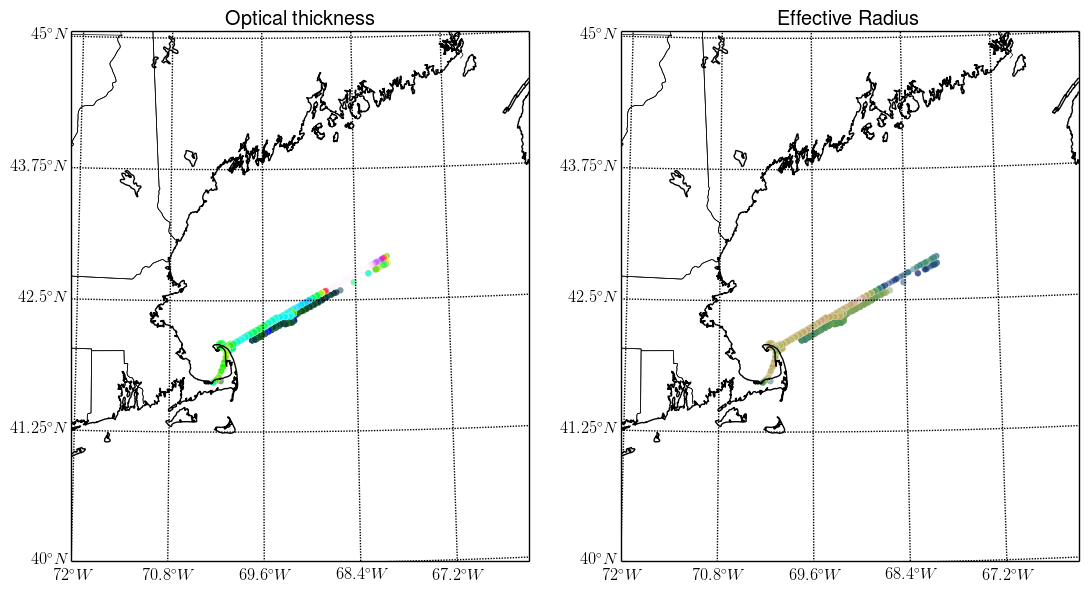

In [83]:
figs2,axs2 = plt.subplots(1,2,figsize=(13,13))
ma1 = tcap_map(axs2[0])
ma2 = tcap_map(axs2[1])
xr,yr = ma1(modis['lon'][meas.ind[0,:],meas.ind[1,:]],modis['lat'][meas.ind[0,:],meas.ind[1,:]])
xi,yi = ma1(meas.lon[meas.good].ravel(),meas.lat[meas.good].ravel()+0.03)
axs2[0].set_title('Optical thickness')
ma1.scatter(xr,yr,c=modis['tau'][meas.ind[0,:],meas.ind[1,:]],
            cmap=plt.cm.gist_ncar,marker='o',vmin=clevels[0],
            vmax=clevels[-1],alpha=0.5,edgecolors='#999999',linewidth=0.15)
ma1.scatter(xi,yi,c=tau[meas.good],
            cmap=plt.cm.gist_ncar,marker='o',vmin=clevels[0],
            vmax=clevels[-1],alpha=0.5,edgecolors='#FFFFFF',linewidth=0.15)

axs2[1].set_title('Effective Radius')
ma2.scatter(xr,yr,c=modis['ref'][meas.ind[0,:],meas.ind[1,:]],
            cmap=plt.cm.gist_earth,marker='o',vmin=clevels2[0],
            vmax=clevels2[-1],alpha=0.5,edgecolors='#999999',linewidth=0.15)
ma2.scatter(xi,yi,c=ref[meas.good],
            cmap=plt.cm.gist_earth,marker='o',vmin=clevels2[0],
            vmax=clevels2[-1],alpha=0.5,edgecolors='#FFFFFF',linewidth=0.15)

## Build the comparison of histograms

build a filter for only showing 1-1 plots

In [256]:
utc = meas.utc[meas.good].ravel()
print utc.shape
ut = (utc > 17.25) & (utc < 17.75)

(823,)


In [279]:
reload(Sp)
from Sp_parameters import doublenanmask
mtau,meastau = doublenanmask(modis['tau'][meas.ind[0,ut],meas.ind[1,ut]],tau[meas.good[ut]].ravel())

In [280]:
print len(meastau)
print len(mtau)

140
140


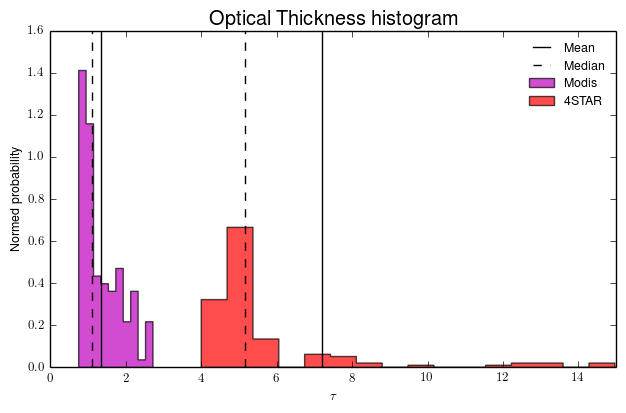

In [291]:
plt.figure()
plt.hist(mtau, bins=10, histtype='stepfilled', normed=True, color='m',alpha=0.7, label='Modis')
plt.hist(meastau, bins=40, histtype='stepfilled', normed=True, color='r',alpha=0.7, label='4STAR')
plt.title('Optical Thickness histogram')
plt.ylabel('Normed probability')
plt.xlabel('$\\tau$')
plt.axvline(np.nanmean(mtau),color='k')
plt.axvline(np.nanmean(meastau),color='k',label='Mean')
plt.axvline(np.median(meastau),color='k',linestyle='--',label='Median')
plt.axvline(np.median(mtau),color='k',linestyle='--')
plt.legend(frameon=False)
plt.xlim([0,15])
plt.savefig(fp+'plots/hist_modis_4star_tau.png',dpi=600)
plt.savefig(fp+'plots/hist_modis_4star_tau.pdf',bbox='tight')

Now for Ref

In [282]:
mref,measref = doublenanmask(modis['ref'][meas.ind[0,ut],meas.ind[1,ut]],ref[meas.good[ut]].ravel())

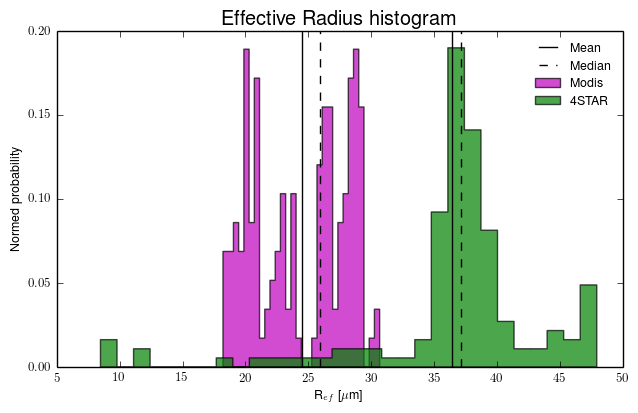

In [283]:
plt.figure()
plt.hist(mref, bins=30, histtype='stepfilled', normed=True, color='m',alpha=0.7, label='Modis')
plt.hist(measref, bins=30, histtype='stepfilled', normed=True, color='g',alpha=0.7, label='4STAR')
plt.title('Effective Radius histogram')
plt.ylabel('Normed probability')
plt.xlabel('R$_{ef}$ [$\\mu$m]')
plt.axvline(np.nanmean(mref),color='k')
plt.axvline(np.nanmean(measref),color='k',label='Mean')
plt.axvline(np.median(measref),color='k',linestyle='--')
plt.axvline(np.median(mref),color='k',linestyle='--',label='Median')
plt.legend(frameon=False)
plt.savefig(fp+'plots/hist_modis_4star_ref.png',dpi=600)
plt.savefig(fp+'plots/hist_modis_4star_ref.pdf',bbox='tight')